# Introduction to AI Engineering

## Definition

**AI Engineering** is the discipline of building production applications powered by foundation models (LLMs, diffusion models, multimodal models). Unlike traditional ML engineering which focuses on training models from scratch, AI Engineering emphasizes:

- **Integration** of pre-trained foundation models
- **Prompt design** and optimization
- **Orchestration** of AI components (RAG, agents, tools)
- **Evaluation** and observability of AI systems
- **Finetuning** a Pre-trained Model
- **Production concerns**: latency, cost, reliability, safety

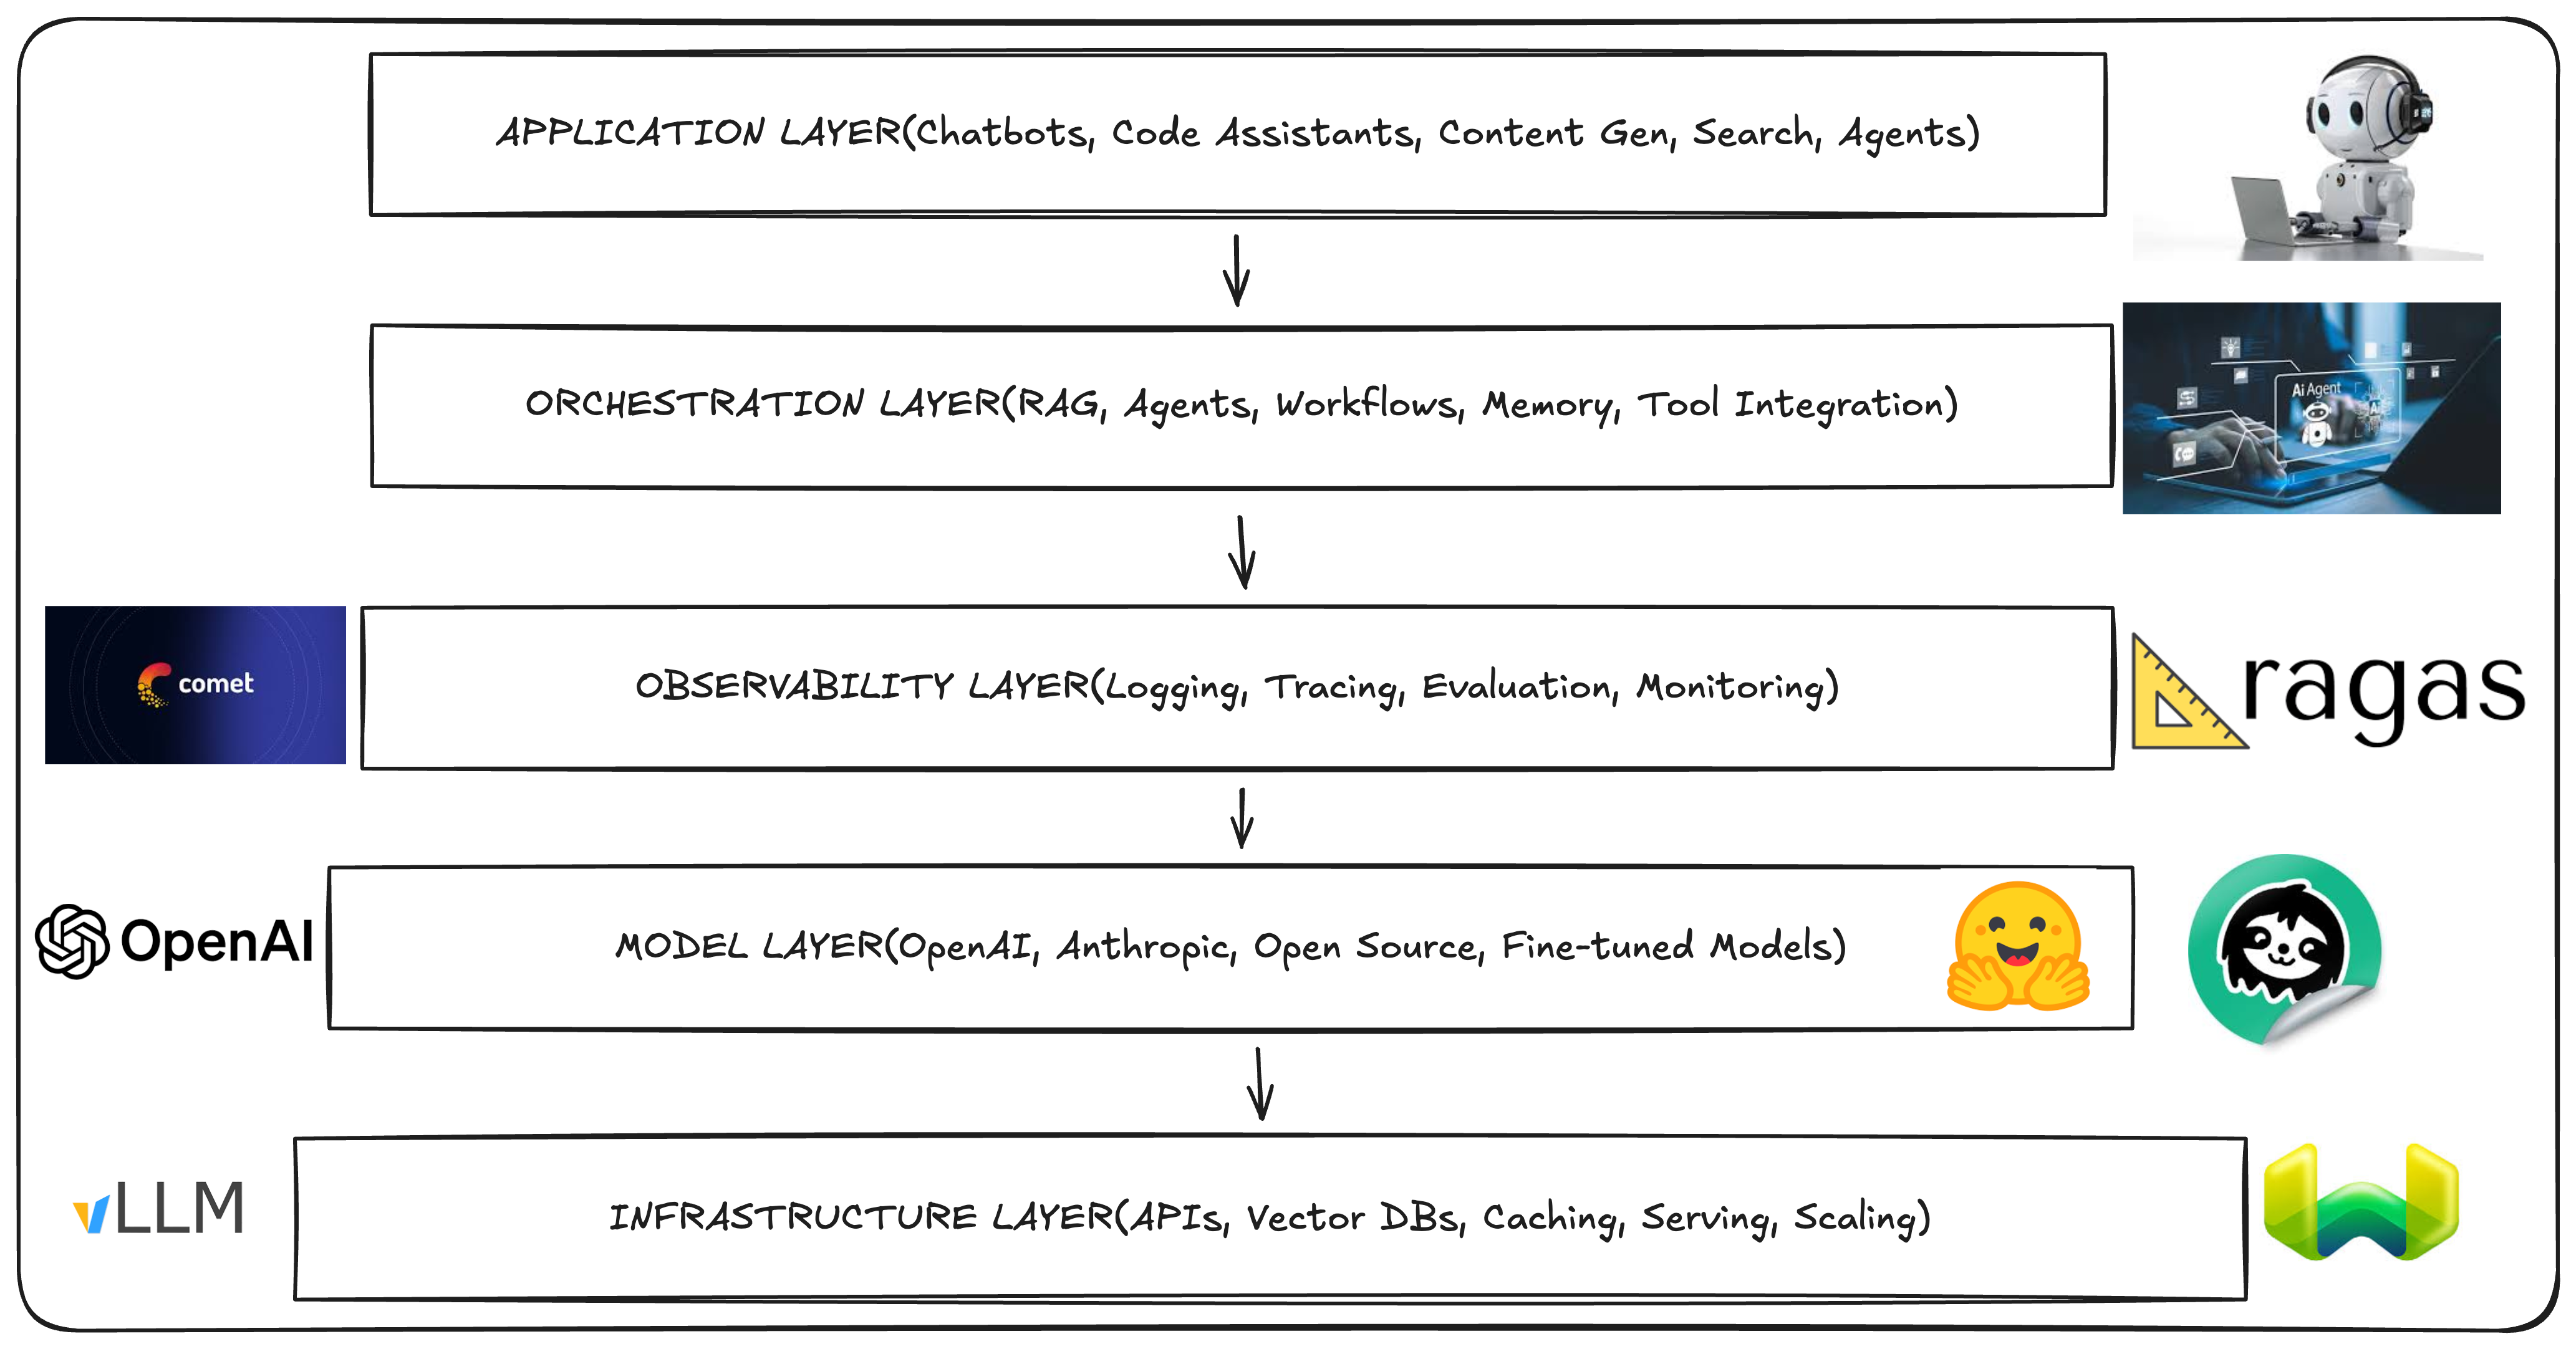

## AI Engineering vs ML Engineering

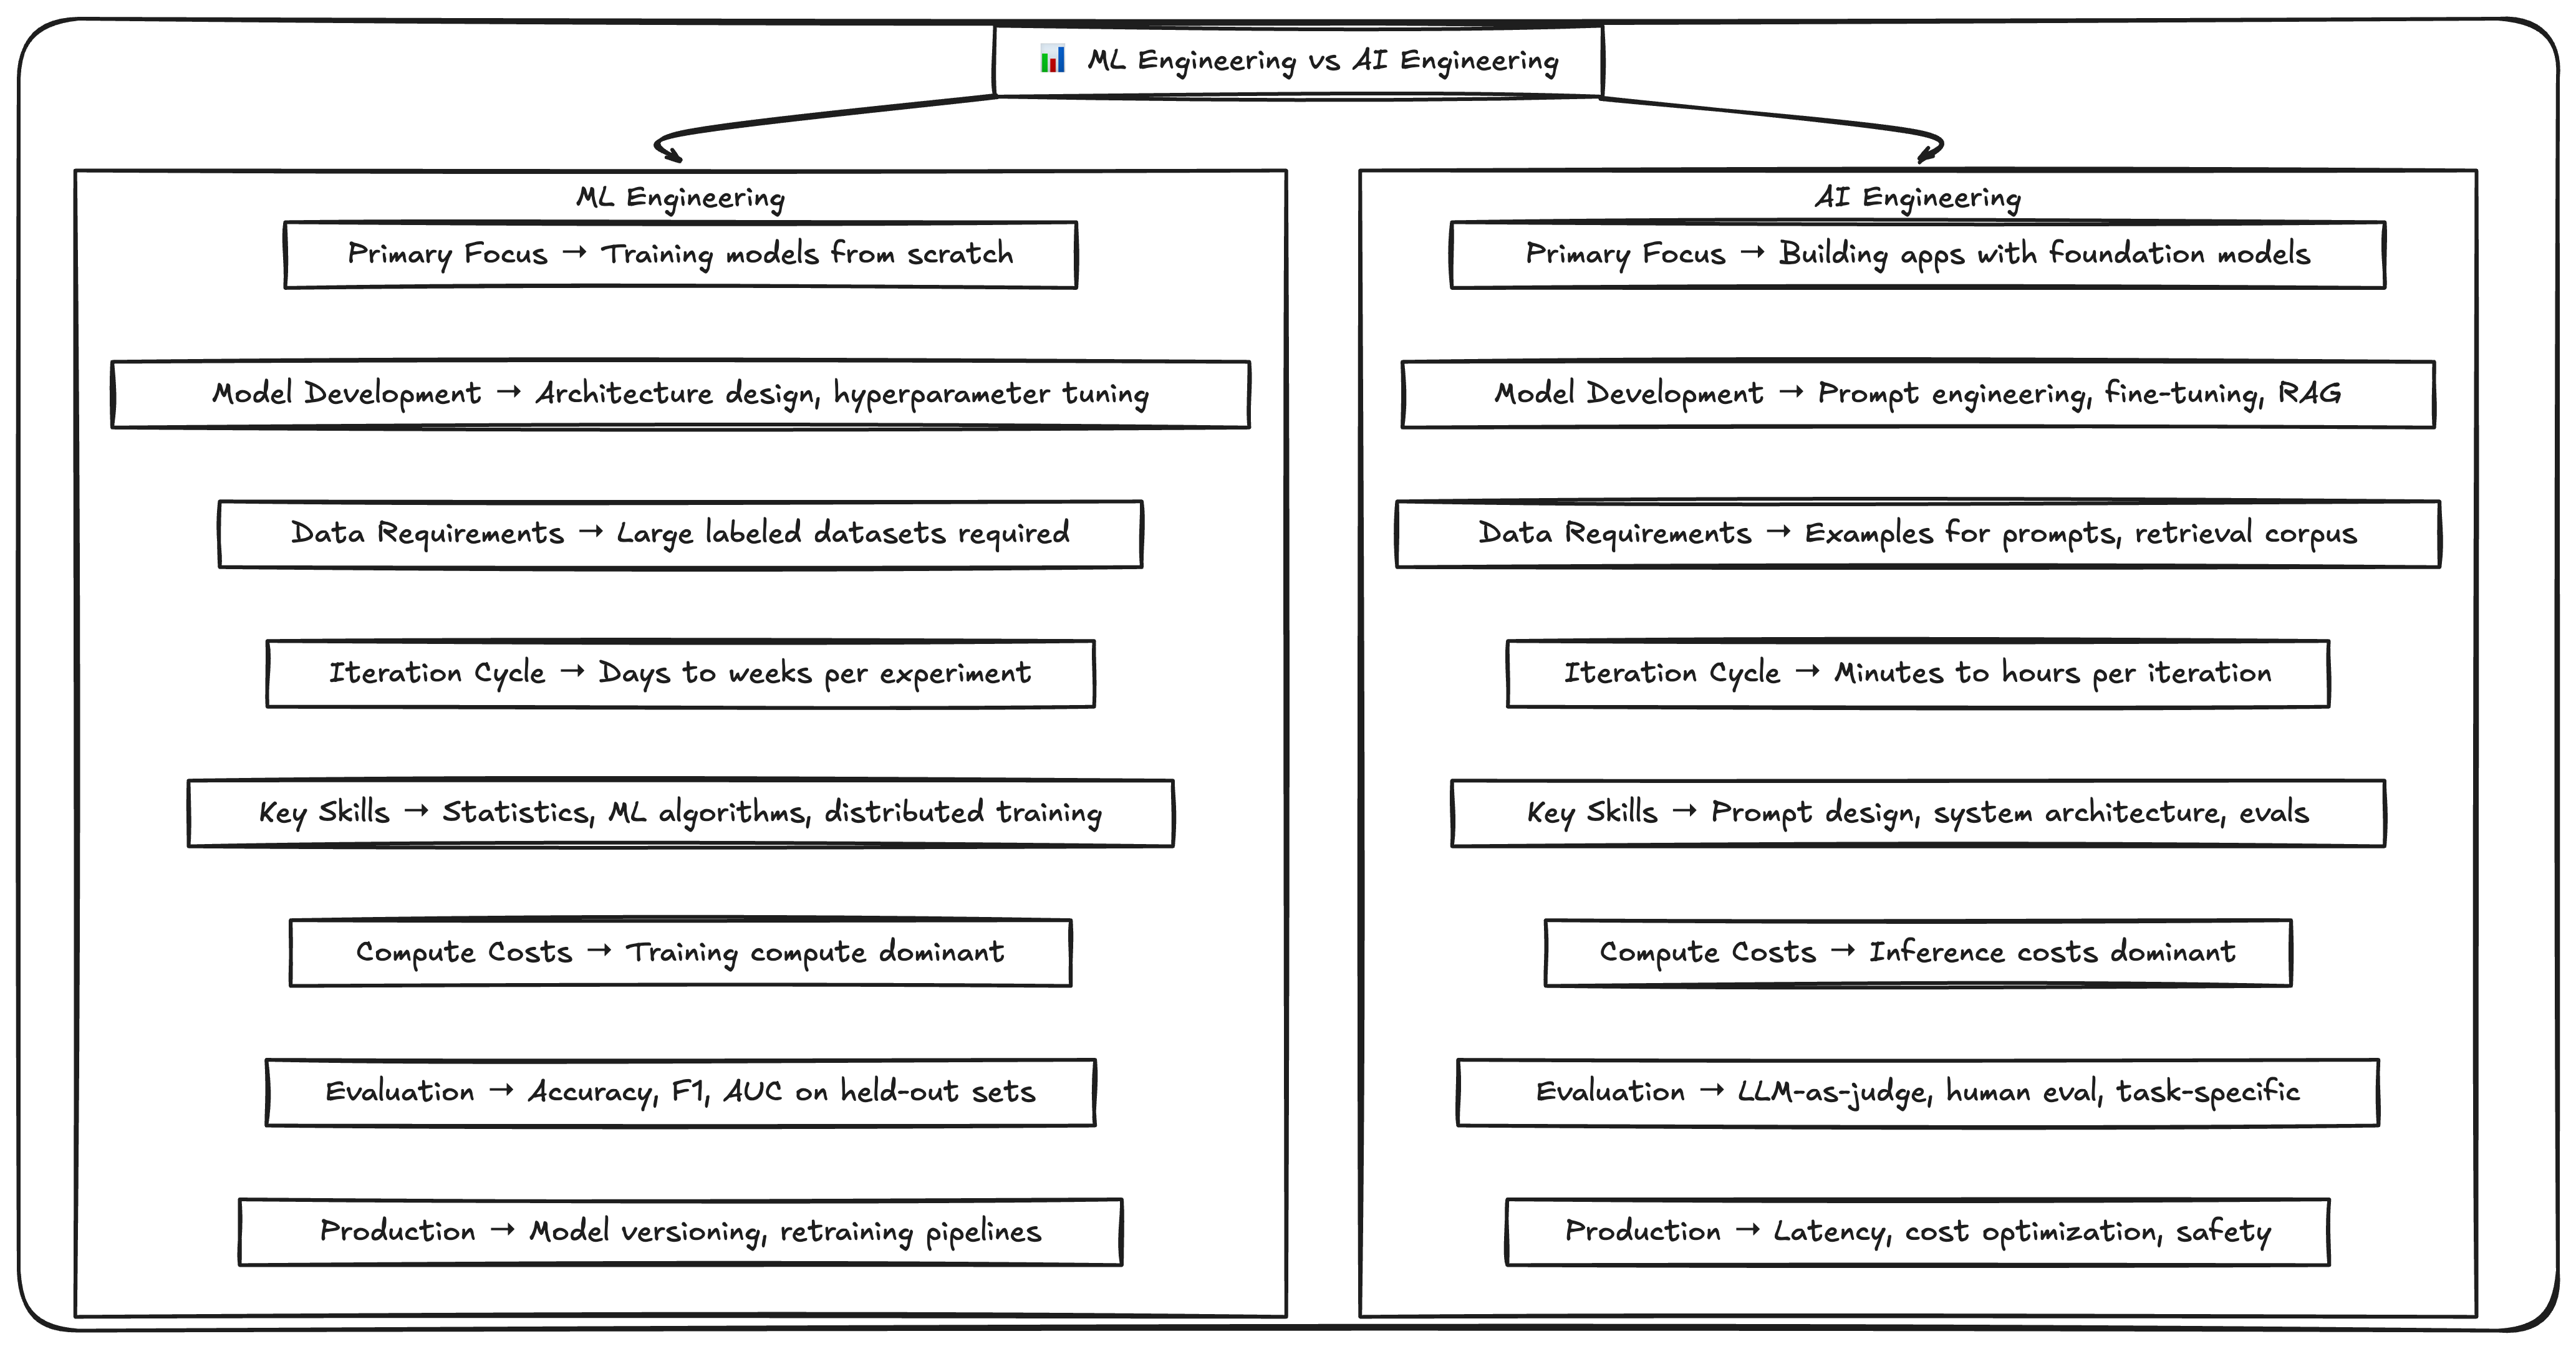

# AI Engineering Landscape

## 1. LLM Providers
APIs for accessing language models:
- **Private**: OpenAI, Google, Anthropic
- **Open-source**: OpenRouter, Hugging Face, Together AI

---

## 2. LLM Application Develepment Ecosystem

| Category | Tools |
|----------|-------|
| **Vector Databases** | Chroma, Pinecone, Milvus, FAISS, Weaviate |
| **Finetuning** | Huggingface TRL |
| **Quantization** | llama.cpp (GGUF), GPTQ, AWQ, SmoothQuant |
| **Evaluation** | Ragas, DeepEval, LM Evaluation Harness |
| **Security** | garak (vulnerability testing), langfuse (monitoring) |
| **Experiment Tracking** | Weights & Biases, Comet, MLflow |

---

## 3. LLM Frameworks

| Category | Frameworks |
|----------|------------|
| **Orchestration** | LangChain, LlamaIndex, MCP |
| **Agents** | LangGraph, smolagents, CrewAI, AutoGen |
| **Fine-Tuning** | TRL, Unsloth, Axolotl |
| **Structured Output** | Outlines, LMQL |
| **Programmatic LLMs** | DSPy |

---

## 4. LLM Infrastructure

| Deployment Type | Tools |
|-----------------|-------|
| **Local** | LM Studio, Ollama, kobold.cpp |
| **Demo/Prototype** | Gradio, Streamlit, HF Spaces |
| **Production Server** | vLLM, TGI, Ray Serve |
| **Edge** | MLC LLM, mnn-llm |
| **Cloud Orchestration** | SkyPilot |

---

## 5. Model Hubs & Data

- **Model Hubs**: Hugging Face Hub, Ollama Library
- **Data Tools**: NeMo-Curator, Distilabel
- **Embedding Models**: Sentence Transformers, MTEB Leaderboard

---

## Quick Reference by Use Case

| Goal | Stack |
|------|-------|
| **Build RAG app** | LangChain/LlamaIndex + Vector DB + Embedding Model |
| **Fine-tune model** | TRL/Unsloth + HF Transformers + W&B |
| **Deploy locally** | Ollama/LM Studio + GGUF models |
| **Production inference** | vLLM/TGI + Cloud/On-prem GPUs |
| **Build agents** | LangGraph/smolagents + Tool integrations |

#1. LLM Providers

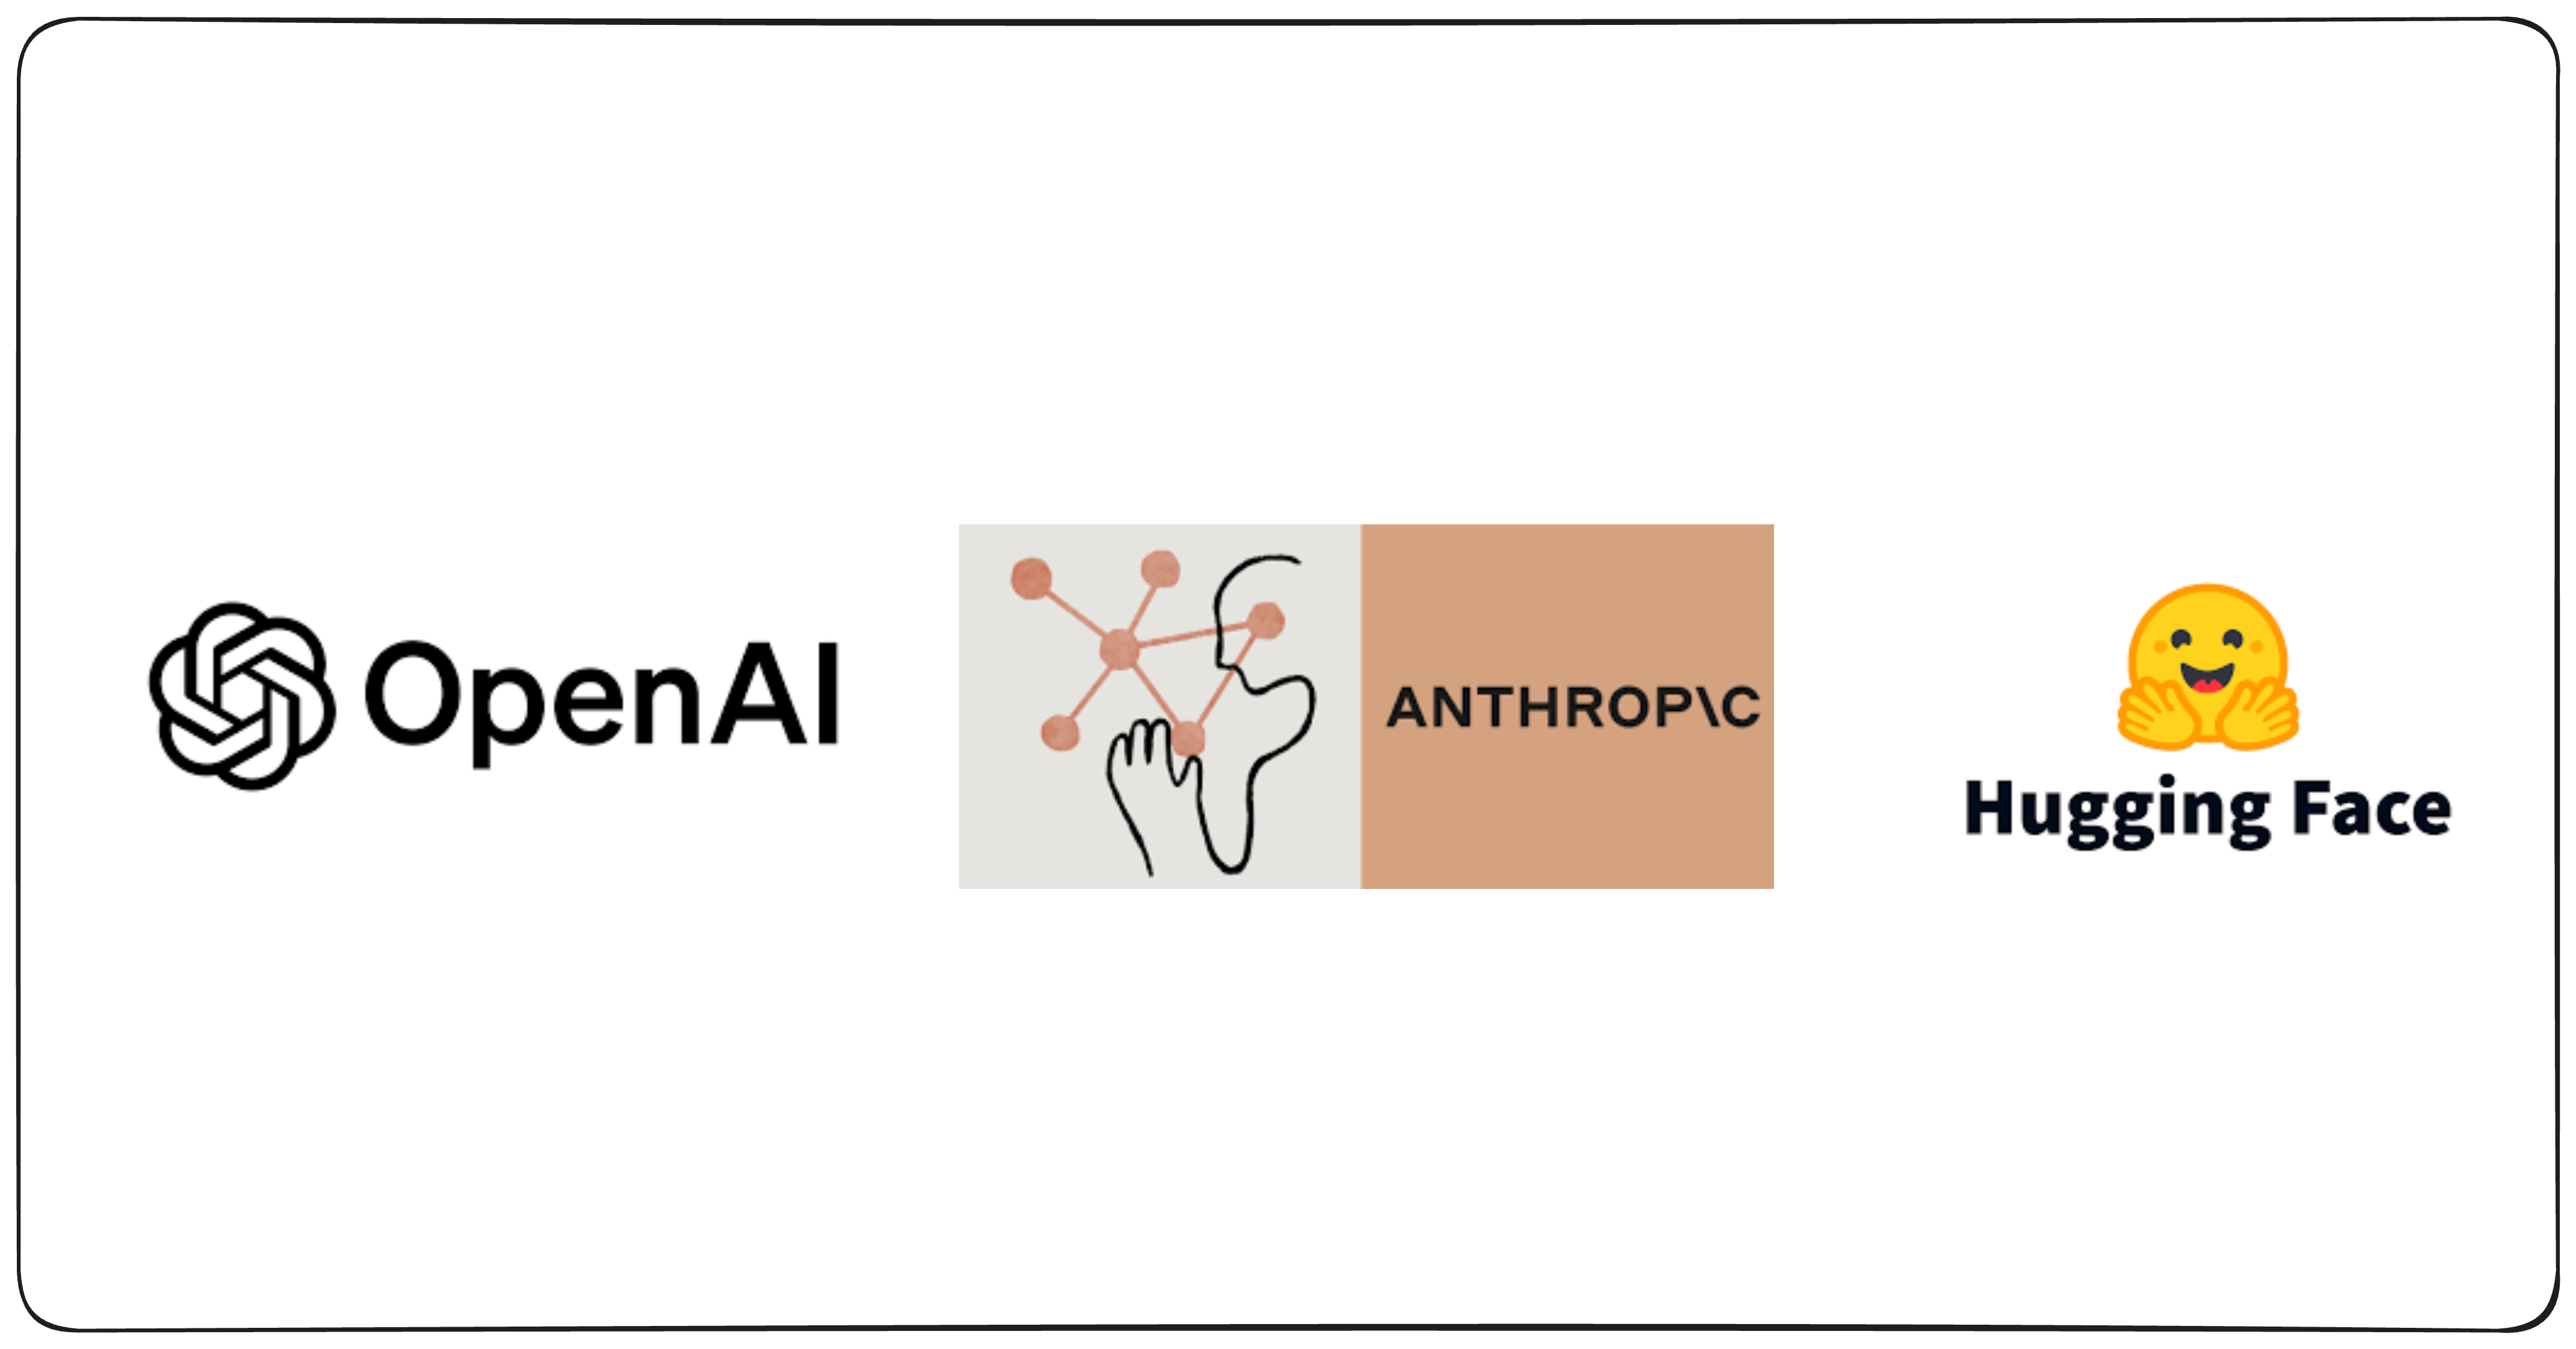

APIs for accessing language models:
- **Private**: OpenAI, Google, Anthropic
- **Open-source**: Hugging Face

## Example: OpenAI SDK API

The OpenAI Python SDK provides a simple interface to interact with GPT models. Below is a minimal example demonstrating a basic chat completion.

#### Installation

In [ ]:
import os
import getpass

In [ ]:
!pip install openai -q

In [ ]:
os.environ['OPENAI_API_KEY'] = getpass.getpass("Enter your Open AI API Key: ")

Enter your Open AI API Key: ··········


In [ ]:
from openai import OpenAI

# Initialize the client (uses OPENAI_API_KEY env variable by default)
client = OpenAI()

# Simple chat completion
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Explain machine learning in one sentence."}
    ],
    max_tokens=100,
    temperature=0.7 #Basically makes it more creative/determinstic
)

# Extract and print the response
response.choices[0].message.content

'Machine learning is a subset of artificial intelligence that enables systems to learn from data, improve their performance over time, and make predictions or decisions without being explicitly programmed.'

#### Key Parameters

| Parameter | Description |
|-----------|-------------|
| `model` | Model ID (e.g., `gpt-4o`, `gpt-4o-mini`, `gpt-3.5-turbo`) |
| `messages` | List of message objects with `role` and `content` |
| `max_tokens` | Maximum tokens in the response |
| `temperature` | Randomness (0 = deterministic, 2 = creative) |
| `stream` | Set `True` for streaming responses |

## Example: Open Source Models(Huggingface)

In [ ]:
!pip install transformers torch accelerate -q

In [ ]:
from transformers import pipeline

# Load a small instruction-tuned model
generator = pipeline(
    "text-generation",
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    device_map="auto"
)

# Format as chat messages
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Explain machine learning in one sentence."}
]

# Generate response
response = generator(
    messages,
    max_new_tokens=100,
    temperature=0.7,
    do_sample=True
)

Device set to use cpu


In [ ]:
response[0]["generated_text"][-1]["content"]

'Machine learning is the process of using data and algorithms to improve the performance of a system, without requiring human intervention or explicit coding.'

#### Difference

| Aspect | OpenAI API | HF Transformers (Local) |
|--------|------------|-------------------------|
| **Setup** | API key only | Download model(~GB)|
| **Cost** | Pay per token | Free (GPU costs)   |
| **Latency** | Low | Depends on hardware       |
| **Privacy** | Data sent to OpenAI | Fullylocal |
| **Models** | GPT-4, GPT-4o, etc. | 500k+ open models |

## Intro to Prompt Engineering Techniques

Prompt engineering is the art of crafting inputs to get optimal outputs from LLMs. Here are the four fundamental techniques with practical examples.

#### Setup

In [ ]:
from openai import OpenAI

client = OpenAI()

def get_response(messages, model="gpt-4o-mini", temperature=0):
    """Helper function for chat completions."""
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=500
    )
    return response.choices[0].message.content

#### 1. Zero-Shot Prompting

Direct instruction without examples. The model relies entirely on its pre-trained knowledge.


In [ ]:
# Zero-Shot: No examples provided
zero_shot_prompt = """
Classify the sentiment of this review as POSITIVE, NEGATIVE, or NEUTRAL.

Review: "The battery life is incredible but the camera quality disappointed me."

Sentiment:
"""

response = get_response([
    {"role": "user", "content": zero_shot_prompt}
])

print(response)

The sentiment of the review is MIXED, as it contains both a positive aspect (incredible battery life) and a negative aspect (disappointing camera quality). However, if you need to classify it strictly as POSITIVE, NEGATIVE, or NEUTRAL, it leans towards NEGATIVE due to the disappointment expressed about the camera quality. 

So, the sentiment is: NEGATIVE.


**When to use:**
Simple tasks, well-defined outputs, when the model already understands the task format.

#### 2. Few-Shot Prompting

Provide examples to guide the model's behavior and output format.

In [ ]:
# Few-Shot: Provide examples first
#Incontext Learning
few_shot_prompt = """
Classify the sentiment of reviews as POSITIVE, NEGATIVE, or NEUTRAL.

Review: "Absolutely love this product! Best purchase ever."
Sentiment: POSITIVE

Review: "Terrible experience. Broke after one day."
Sentiment: NEGATIVE

Review: "It works as expected. Nothing special."
Sentiment: NEUTRAL

Review: "The battery life is incredible but the camera quality disappointed me."
Sentiment:
"""

response = get_response([
    {"role": "user", "content": few_shot_prompt}
])

print(response)

Sentiment: NEUTRAL


**When to use:** Custom formats, domain-specific tasks, edge cases, or when zero-shot gives inconsistent results.



#### 3. Chain of Thought (CoT)

Encourage step-by-step reasoning before the final answer. Dramatically improves performance on complex reasoning tasks.


In [ ]:
# Chain of Thought: Force step-by-step reasoning
cot_prompt = """
Solve this problem step by step.

Problem: A store sells apples for $2 each. If you buy 5 or more, you get 20% off
the total. How much would 7 apples cost?

Think through this step by step:
"""

response = get_response([
    {"role": "user", "content": cot_prompt}
])

print(response)

To find out how much 7 apples would cost at the store, we can follow these steps:

1. **Determine the price of one apple**: The store sells apples for $2 each.

2. **Calculate the total cost without discount for 7 apples**:
   \[
   \text{Total cost without discount} = \text{Price per apple} \times \text{Number of apples}
   \]
   \[
   \text{Total cost without discount} = 2 \times 7 = 14
   \]

3. **Check if a discount applies**: The store offers a 20% discount if you buy 5 or more apples. Since we are buying 7 apples, we qualify for the discount.

4. **Calculate the discount amount**:
   \[
   \text{Discount} = \text{Total cost without discount} \times \text{Discount rate}
   \]
   \[
   \text{Discount} = 14 \times 0.20 = 2.8
   \]

5. **Calculate the total cost after applying the discount**:
   \[
   \text{Total cost after discount} = \text{Total cost without discount} - \text{Discount}
   \]
   \[
   \text{Total cost after discount} = 14 - 2.8 = 11.2
   \]

6. **Final answer**: The

**When to use:** Math problems, logic puzzles, multi-step reasoning, any task requiring intermediate steps.


# 2. LLM Application Develepment  Ecosystem

| Category | Tools | Description |
|----------|-------|-------------|
| **Vector Databases** | Chroma, Pinecone, Milvus, FAISS, Weaviate | Store and retrieve embeddings for semantic search and RAG pipelines |
| **Finetuning** | TRL | Customize Model on your own data |
| **Quantization** | llama.cpp (GGUF), GPTQ, AWQ, SmoothQuant | Compress model weights to reduce memory and speed up inference |
| **Evaluation** | Ragas, DeepEval, LM Evaluation Harness | Benchmark model performance on accuracy, faithfulness, and relevance |
| **Security** | garak (vulnerability testing), langfuse (monitoring) | Detect prompt injection, jailbreaks, and monitor production behavior |
| **Experiment Tracking** | Weights & Biases, Comet, MLflow | Log hyperparameters, metrics, and artifacts across training runs |

---

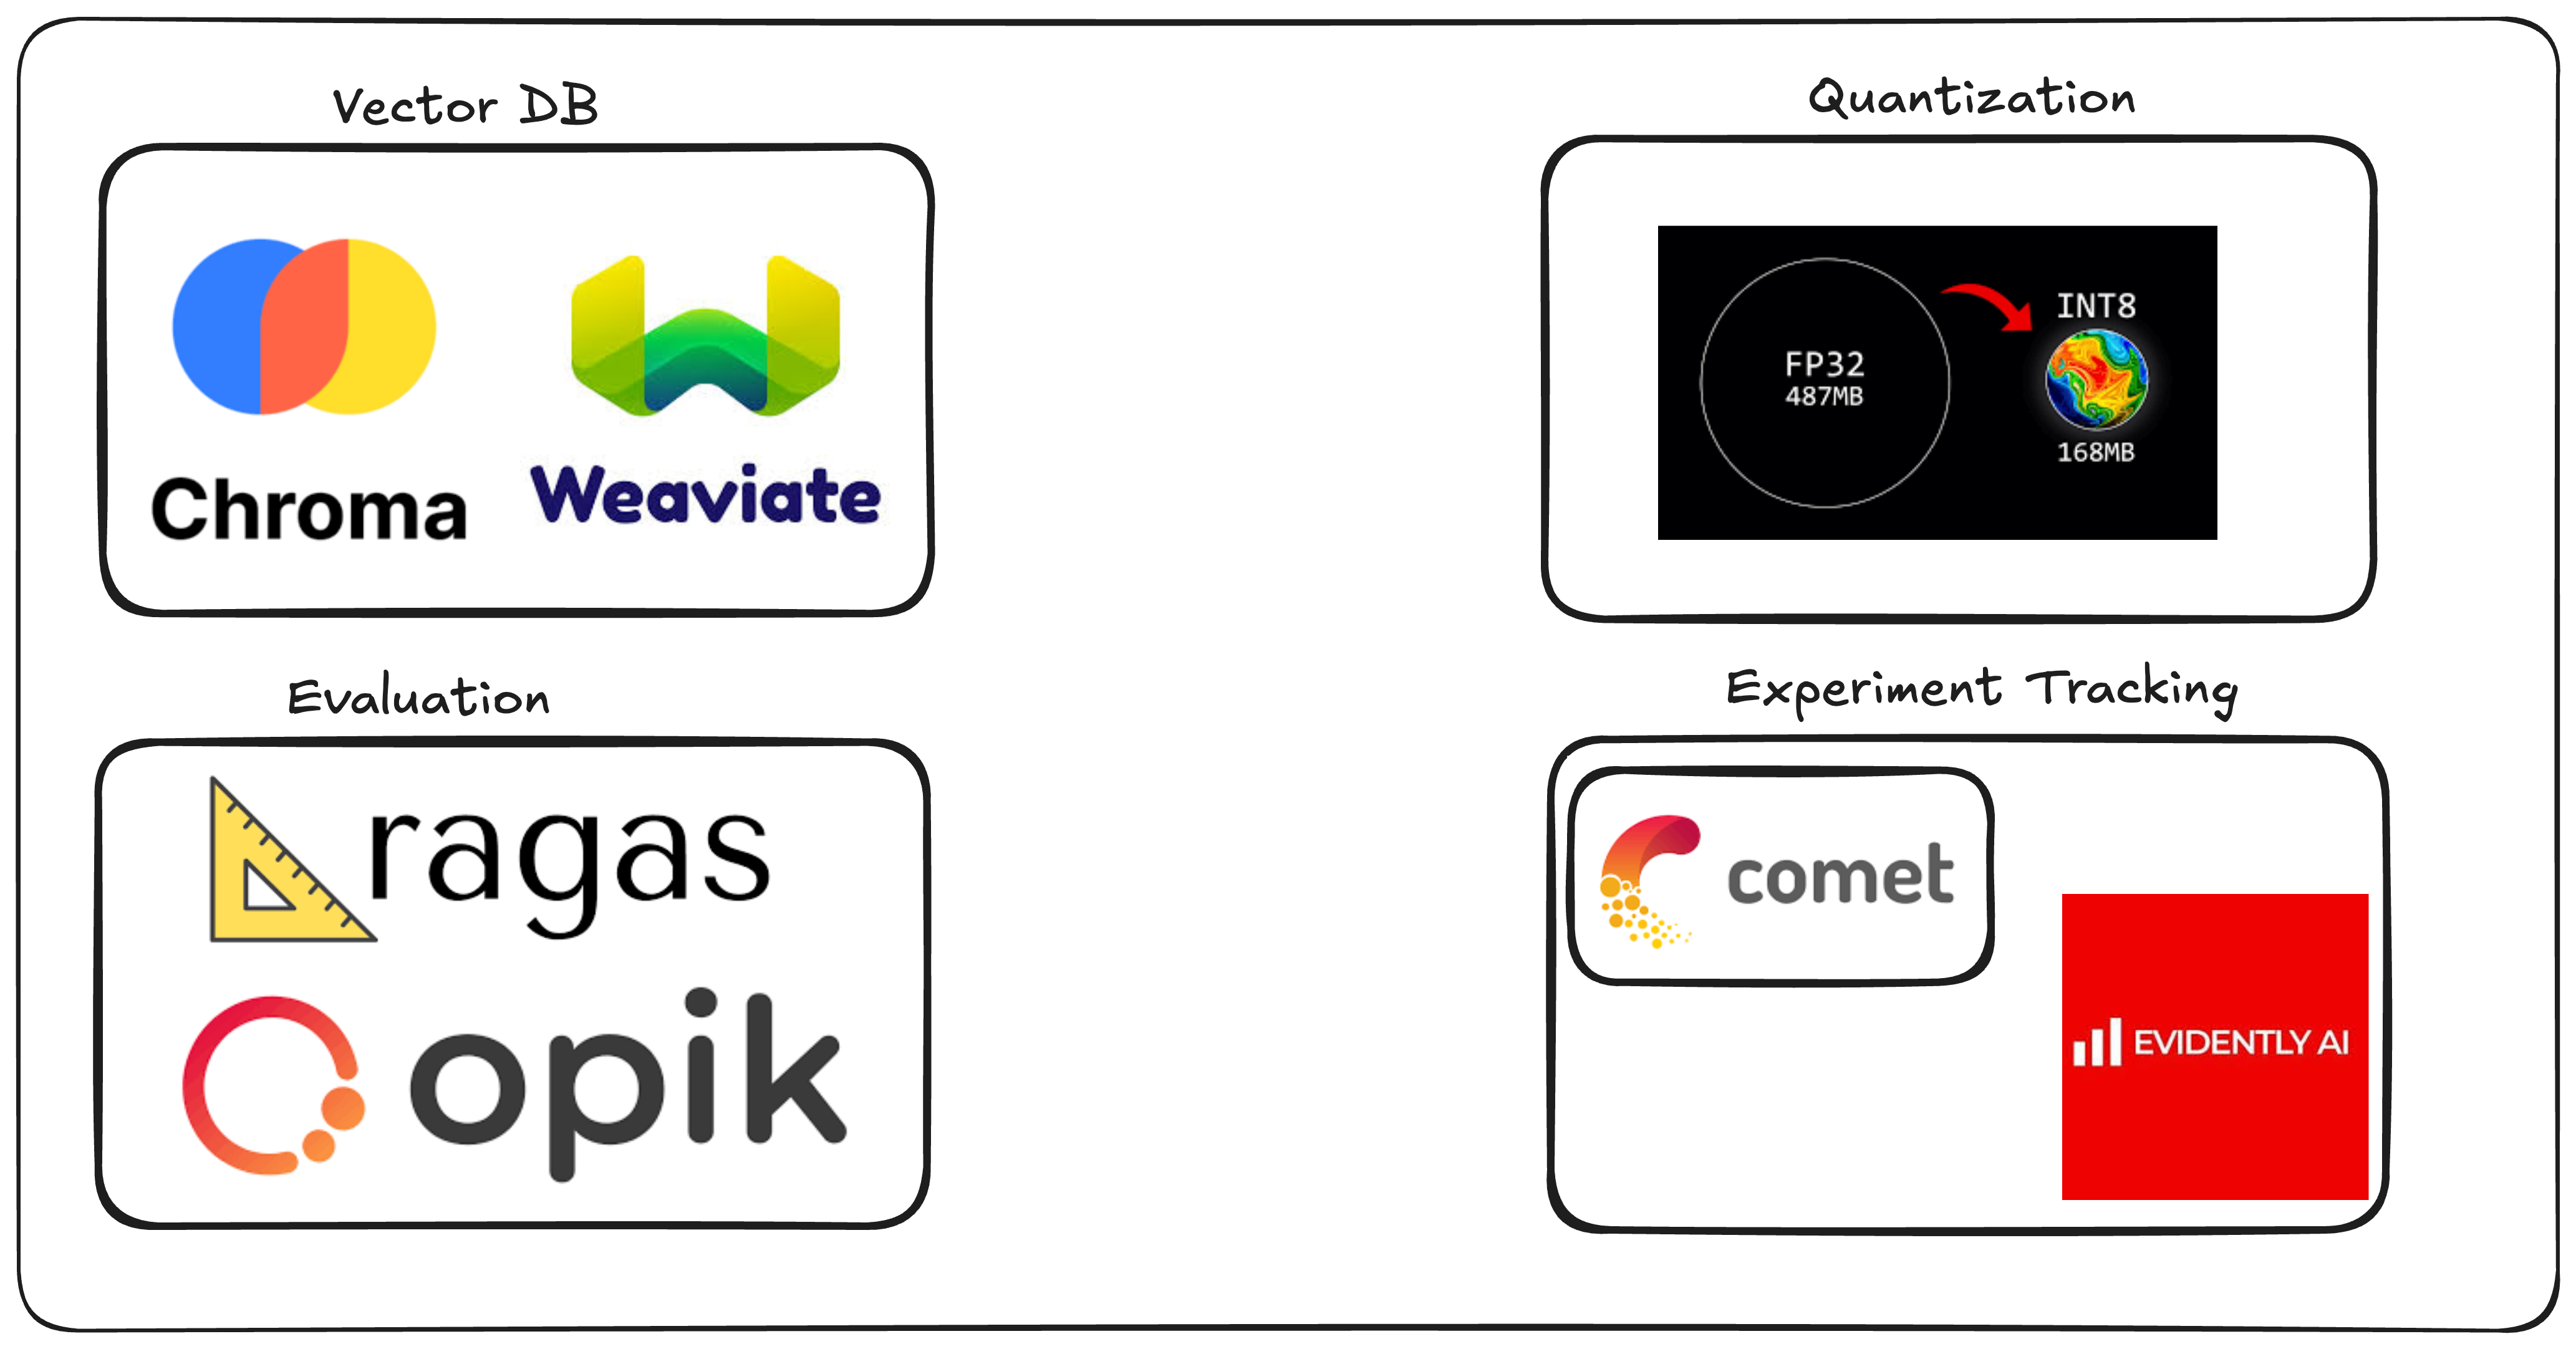

## Example: RAG and LLM Evaluation

In [ ]:
!pip install openai faiss-cpu ragas numpy -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.7/366.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.8/358.8 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.4/226.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 k

In [ ]:
import numpy as np
import faiss
from openai import OpenAI

client = OpenAI()

### RAG

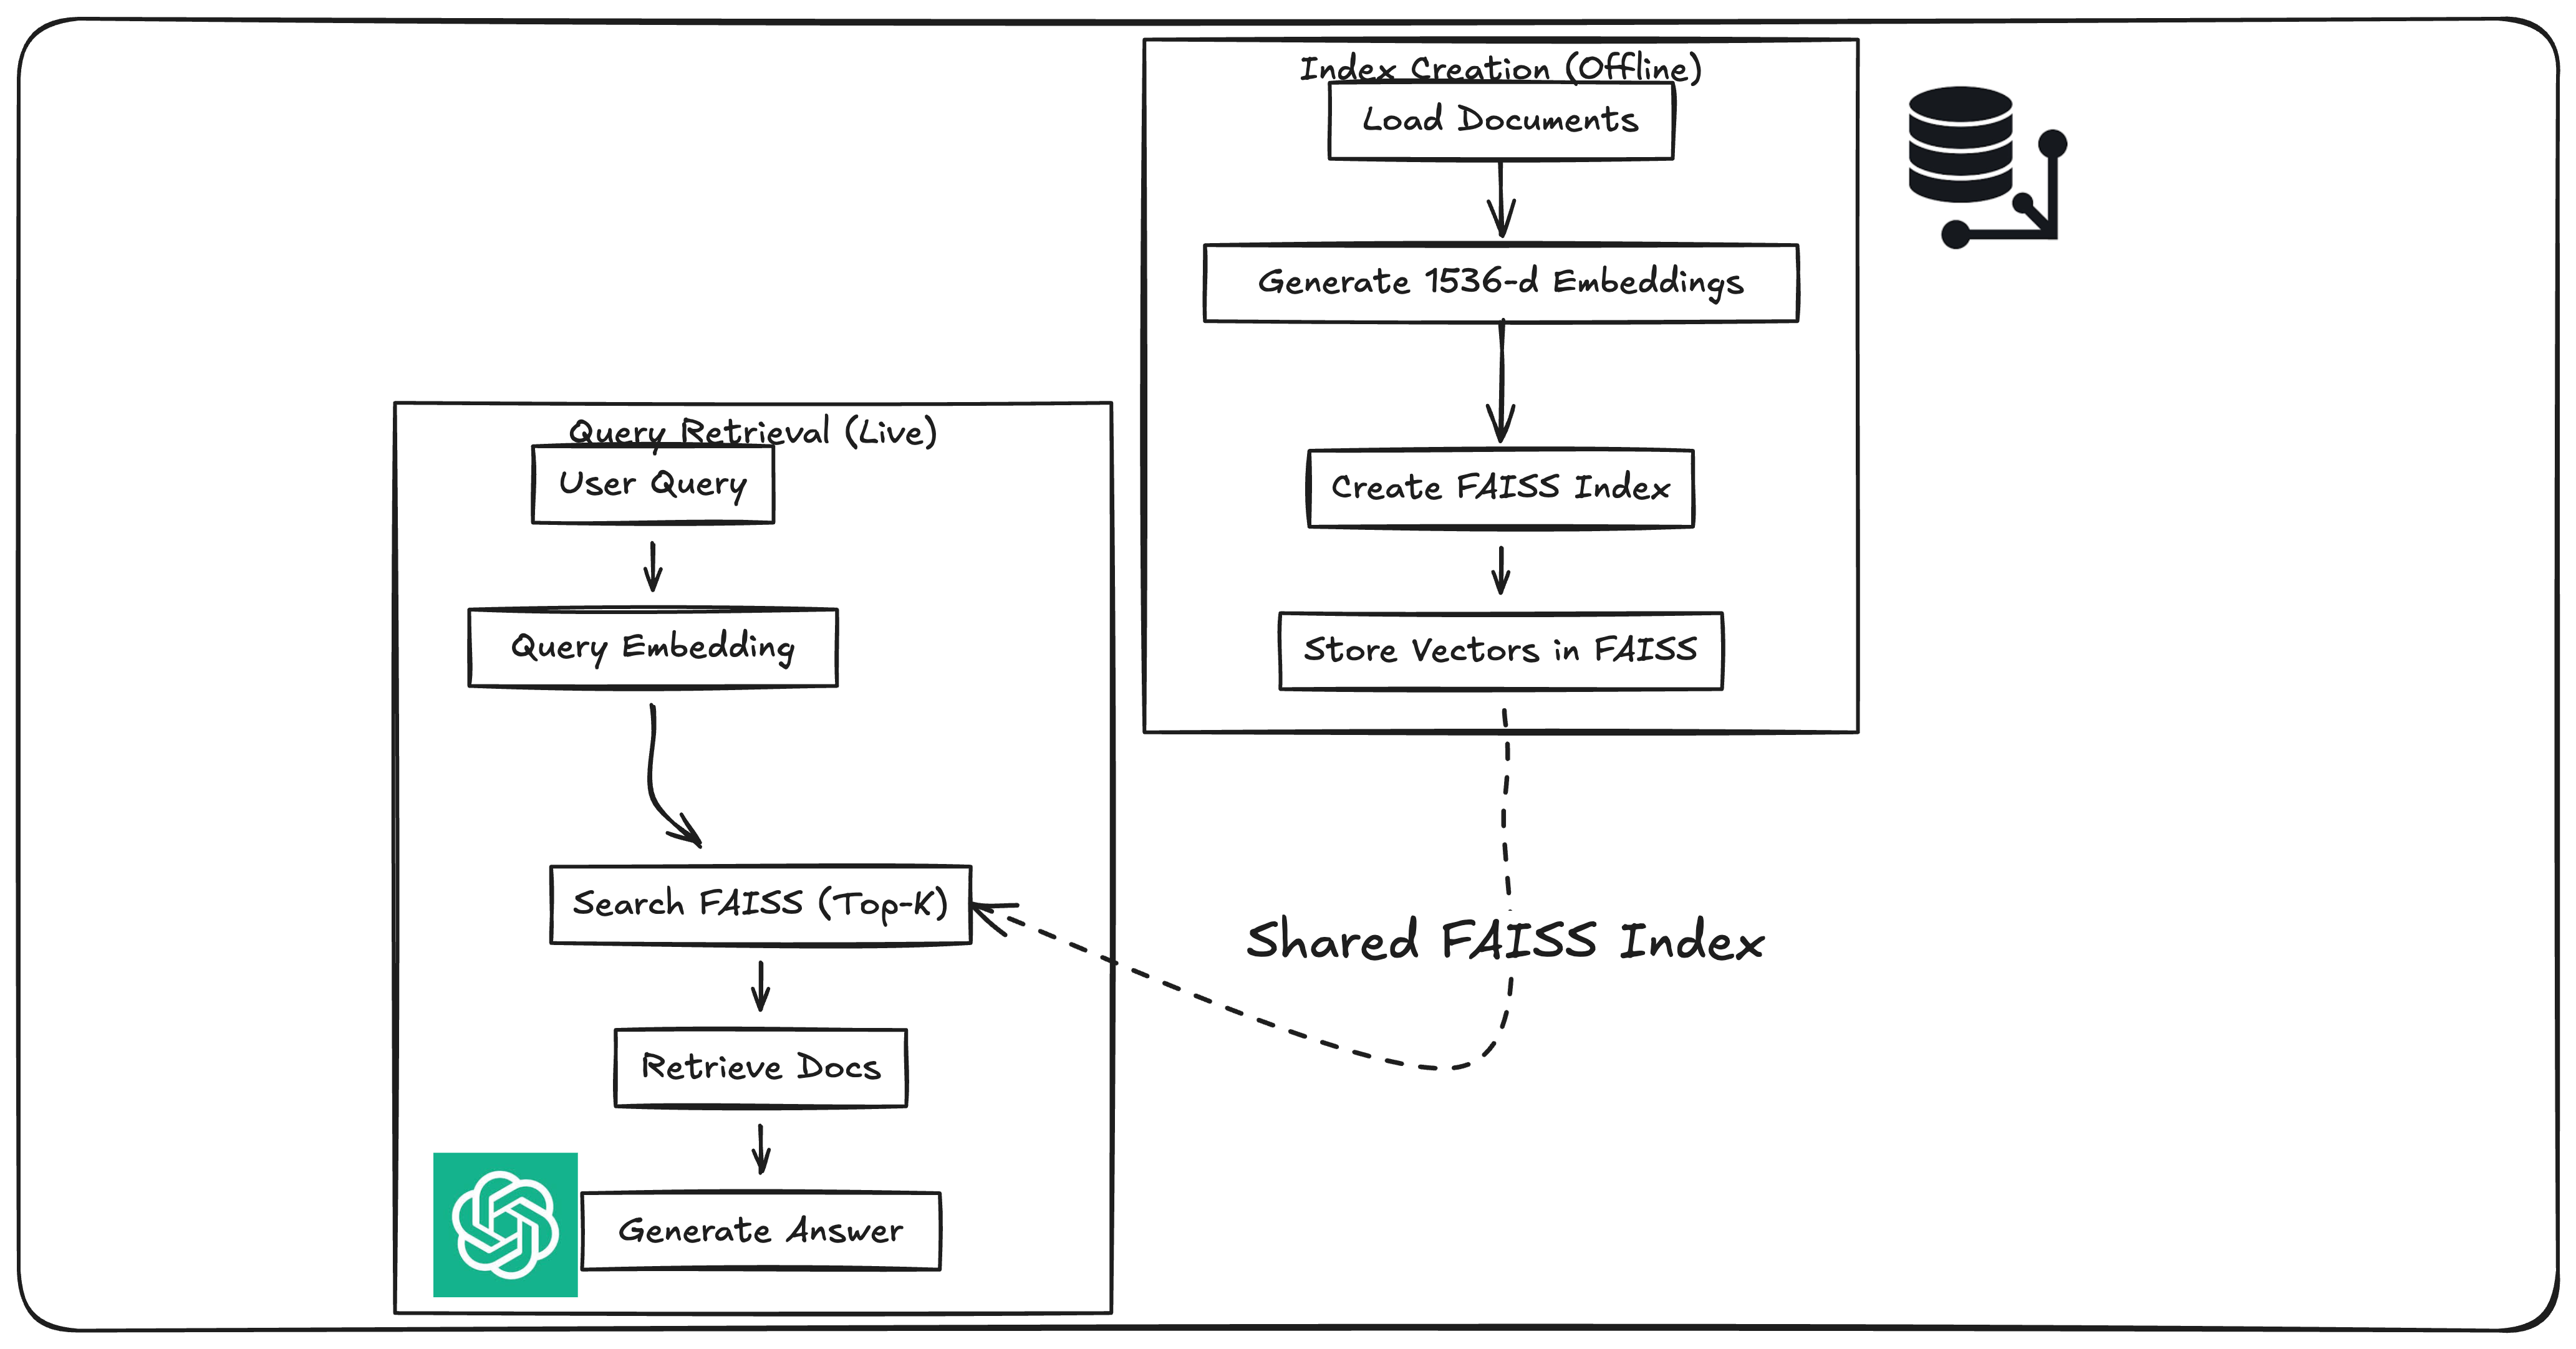

In [ ]:
# =============================================================================
# STEP 1: Sample Knowledge Base
# =============================================================================
documents = [
    "Python was created by Guido van Rossum and released in 1991.",
    "FAISS is a library for efficient similarity search developed by Facebook AI.",
    "RAG combines retrieval with generation to ground LLM responses in facts.",
    "Vector databases store embeddings for fast nearest-neighbor search.",
    "OpenAI's text-embedding-3-small model produces 1536-dimensional vectors."
]

In [ ]:
# =============================================================================
# STEP 2: Create Embeddings (OpenAI)
# =============================================================================
def get_embeddings(texts: list[str]) -> np.ndarray:
    """Get embeddings for a list of texts."""
    response = client.embeddings.create(
        model="text-embedding-3-small",
        input=texts
    )
    return np.array([e.embedding for e in response.data], dtype="float32")

# Embed all documents
doc_embeddings = get_embeddings(documents)
print(f"Embeddings shape: {doc_embeddings.shape}")  # (5, 1536)

Embeddings shape: (5, 1536)


#### Why Vector Databases?

Traditional databases search by exact match (`WHERE name = 'John'`). Vector databases search by similarity (`find items most similar to this embedding`). This enables:

- **Semantic search**: "affordable laptops" matches "budget notebooks"
- **RAG pipelines**: Retrieve relevant context for LLM generation
- **Recommendation systems**: Find similar products, content, users
- **Anomaly detection**: Identify outliers in embedding space

#### How They Work

```
1. INDEXING
   Document → Embedding Model → [0.12, -0.34, 0.56, ...] → Vector DB

2. QUERYING  
   Query → Embedding Model → [0.15, -0.31, 0.52, ...] → Similarity Search → Top-K Results
```

#### Distance Metrics

| Metric | Formula | Best For |
|--------|---------|----------|
| **Cosine Similarity** | cos(θ) = A·B / (‖A‖‖B‖) | Text embeddings (normalized) |
| **Euclidean (L2)** | √Σ(aᵢ - bᵢ)² | Image embeddings |
| **Dot Product** | Σ(aᵢ × bᵢ) | When magnitude matters |

In [ ]:
# =============================================================================
# STEP 3: Store in FAISS
# =============================================================================
dimension = doc_embeddings.shape[1]  # 1536
index = faiss.IndexFlatL2(dimension)  # L2 distance
index.add(doc_embeddings)
print(f"FAISS index size: {index.ntotal} vectors")

FAISS index size: 5 vectors


In [ ]:
# =============================================================================
# STEP 4: Retrieve Relevant Documents
# =============================================================================
def retrieve(query: str, k: int = 2) -> list[str]:
    """Retrieve top-k relevant documents."""
    query_embedding = get_embeddings([query])
    distances, indices = index.search(query_embedding, k)
    return [documents[i] for i in indices[0]]

# Test retrieval
query = "Who created Python?"
retrieved_docs = retrieve(query, k=2)
print(f"Retrieved: {retrieved_docs}")



Retrieved: ['Python was created by Guido van Rossum and released in 1991.', "OpenAI's text-embedding-3-small model produces 1536-dimensional vectors."]


In [ ]:
# =============================================================================
# STEP 5: Generate Answer (RAG)
# =============================================================================
def generate_answer(query: str, context: list[str]) -> str:
    """Generate answer using retrieved context."""
    context_str = "\n".join(context)

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "Answer based only on the provided context."},
            {"role": "user", "content": f"Context:\n{context_str}\n\nQuestion: {query}"}
        ],
        temperature=0
    )
    return response.choices[0].message.content

answer = generate_answer(query, retrieved_docs)
print(f"Answer: {answer}")



Answer: Python was created by Guido van Rossum.


### LLM Evaluation

In [ ]:
from ragas import evaluate
from ragas.metrics import Faithfulness, ResponseRelevancy
from ragas.dataset_schema import SingleTurnSample
from ragas.llms import LangchainLLMWrapper
from langchain_openai import ChatOpenAI

# Wrap OpenAI for Ragas
#Gpt5
evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4o-mini"))

# Create sample
sample = SingleTurnSample(
    user_input=query,
    retrieved_contexts=retrieved_docs,
    response=answer
)

# Evaluate single metric
faithfulness = Faithfulness(llm=evaluator_llm)
score = faithfulness.single_turn_score(sample)


/tmp/ipython-input-1483608124.py:8: DeprecationWarning: LangchainLLMWrapper is deprecated and will be removed in a future version. Use llm_factory instead: from openai import OpenAI; from ragas.llms import llm_factory; llm = llm_factory('gpt-4o-mini', client=OpenAI(api_key='...'))
  evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4o-mini"))


In [ ]:
print(f"Faithfulness: {score}")

Faithfulness: 1.0


### Comet ML: Complete LLM Tracking Pipeline

Comet provides specialized tools for tracking prompts, fine-tuning experiments, and model evaluation. Here's a complete pipeline.

#### Installation

In [ ]:
!pip install comet_ml -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.8 MB/s eta 0:00:00


In [ ]:
pip install --upgrade setuptools

In [ ]:
# IMPORTANT: Import comet_ml FIRST, before other ML libraries
import comet_ml
import os
import getpass
# Set credentials
os.environ["COMET_API_KEY"] = getpass.getpass()

··········


In [ ]:
# Initialize Comet experiment
experiment = comet_ml.Experiment(
    project_name="simple-finetune",
    auto_metric_logging=True,
    auto_param_logging=True,
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch, keras, tensorflow.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : residential_snake_5406
COMET INFO:     url                   : https://www.comet.com/satya-pattnaik-0489/emotion-classification/8ab6fb587112438b89bea290e809366e
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1xCV0L1peYRi8Uk-LRTA1wwB3VGjnnMaE
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COM

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import Dataset

In [ ]:
# Step 2: Create simple dataset
data = [
    "Q: What is AI? A: Artificial Intelligence.",
    "Q: What is ML? A: Machine Learning.",
    "Q: What is Python? A: A programming language.",
    "Q: What is 2+2? A: 4.",
    "Q: Say hello. A: Hello there!",
]

dataset = Dataset.from_dict({"text": data})

# Step 3: Load tiny model
model_name = "distilgpt2"  # Only 82M parameters
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name)

# Step 4: Tokenize
def tokenize(example):
    tokens = tokenizer(example["text"], truncation=True, padding="max_length", max_length=64)
    tokens["labels"] = tokens["input_ids"].copy()
    return tokens

tokenized = dataset.map(tokenize)

# Step 5: Train
trainer = Trainer(
    model=model,
    train_dataset=tokenized,
    args=TrainingArguments(
        output_dir="./output",
        num_train_epochs=3,
        per_device_train_batch_size=2,
        logging_steps=1,
        report_to="none",
    ),
)

trainer.train()

# Step 6: Log to Comet
experiment.log_parameter("model", model_name)
experiment.log_parameter("data_size", len(data))
experiment.end()

print("✅ Done! Check Comet dashboard.")

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : key_manor_1183
COMET INFO:     url                   : https://www.comet.com/satya-pattnaik-0489/simple-finetune/b73477f279c54262ab5cdf29c2f193f9
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1xCV0L1peYRi8Uk-LRTA1wwB3VGjnnMaE
COMET INFO:   Parameters:
COMET INFO:     data_size : 5
COMET INFO:     model     : distilgpt2
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COME

✅ Done! Check Comet dashboard.


# 3. LLM Frameworks

| Category | Frameworks | Description |
|----------|------------|-------------|
| **Orchestration** | LangChain, LlamaIndex, MCP | Chain LLM calls with tools, memory, and retrieval in modular pipelines |
| **Agents** | LangGraph, smolagents, CrewAI, AutoGen | Build stateful agents with reasoning loops and multi-agent collaboration |
| **Fine-Tuning** | TRL, Unsloth, Axolotl | Train and align LLMs with SFT, DPO, RLHF, and GRPO |
| **Structured Output** | Outlines, LMQL | Constrain LLM outputs to JSON schemas, regex, or grammars |
| **Programmatic LLMs** | DSPy, TextGrad | Optimize prompts and weights automatically using gradient-like methods |

---

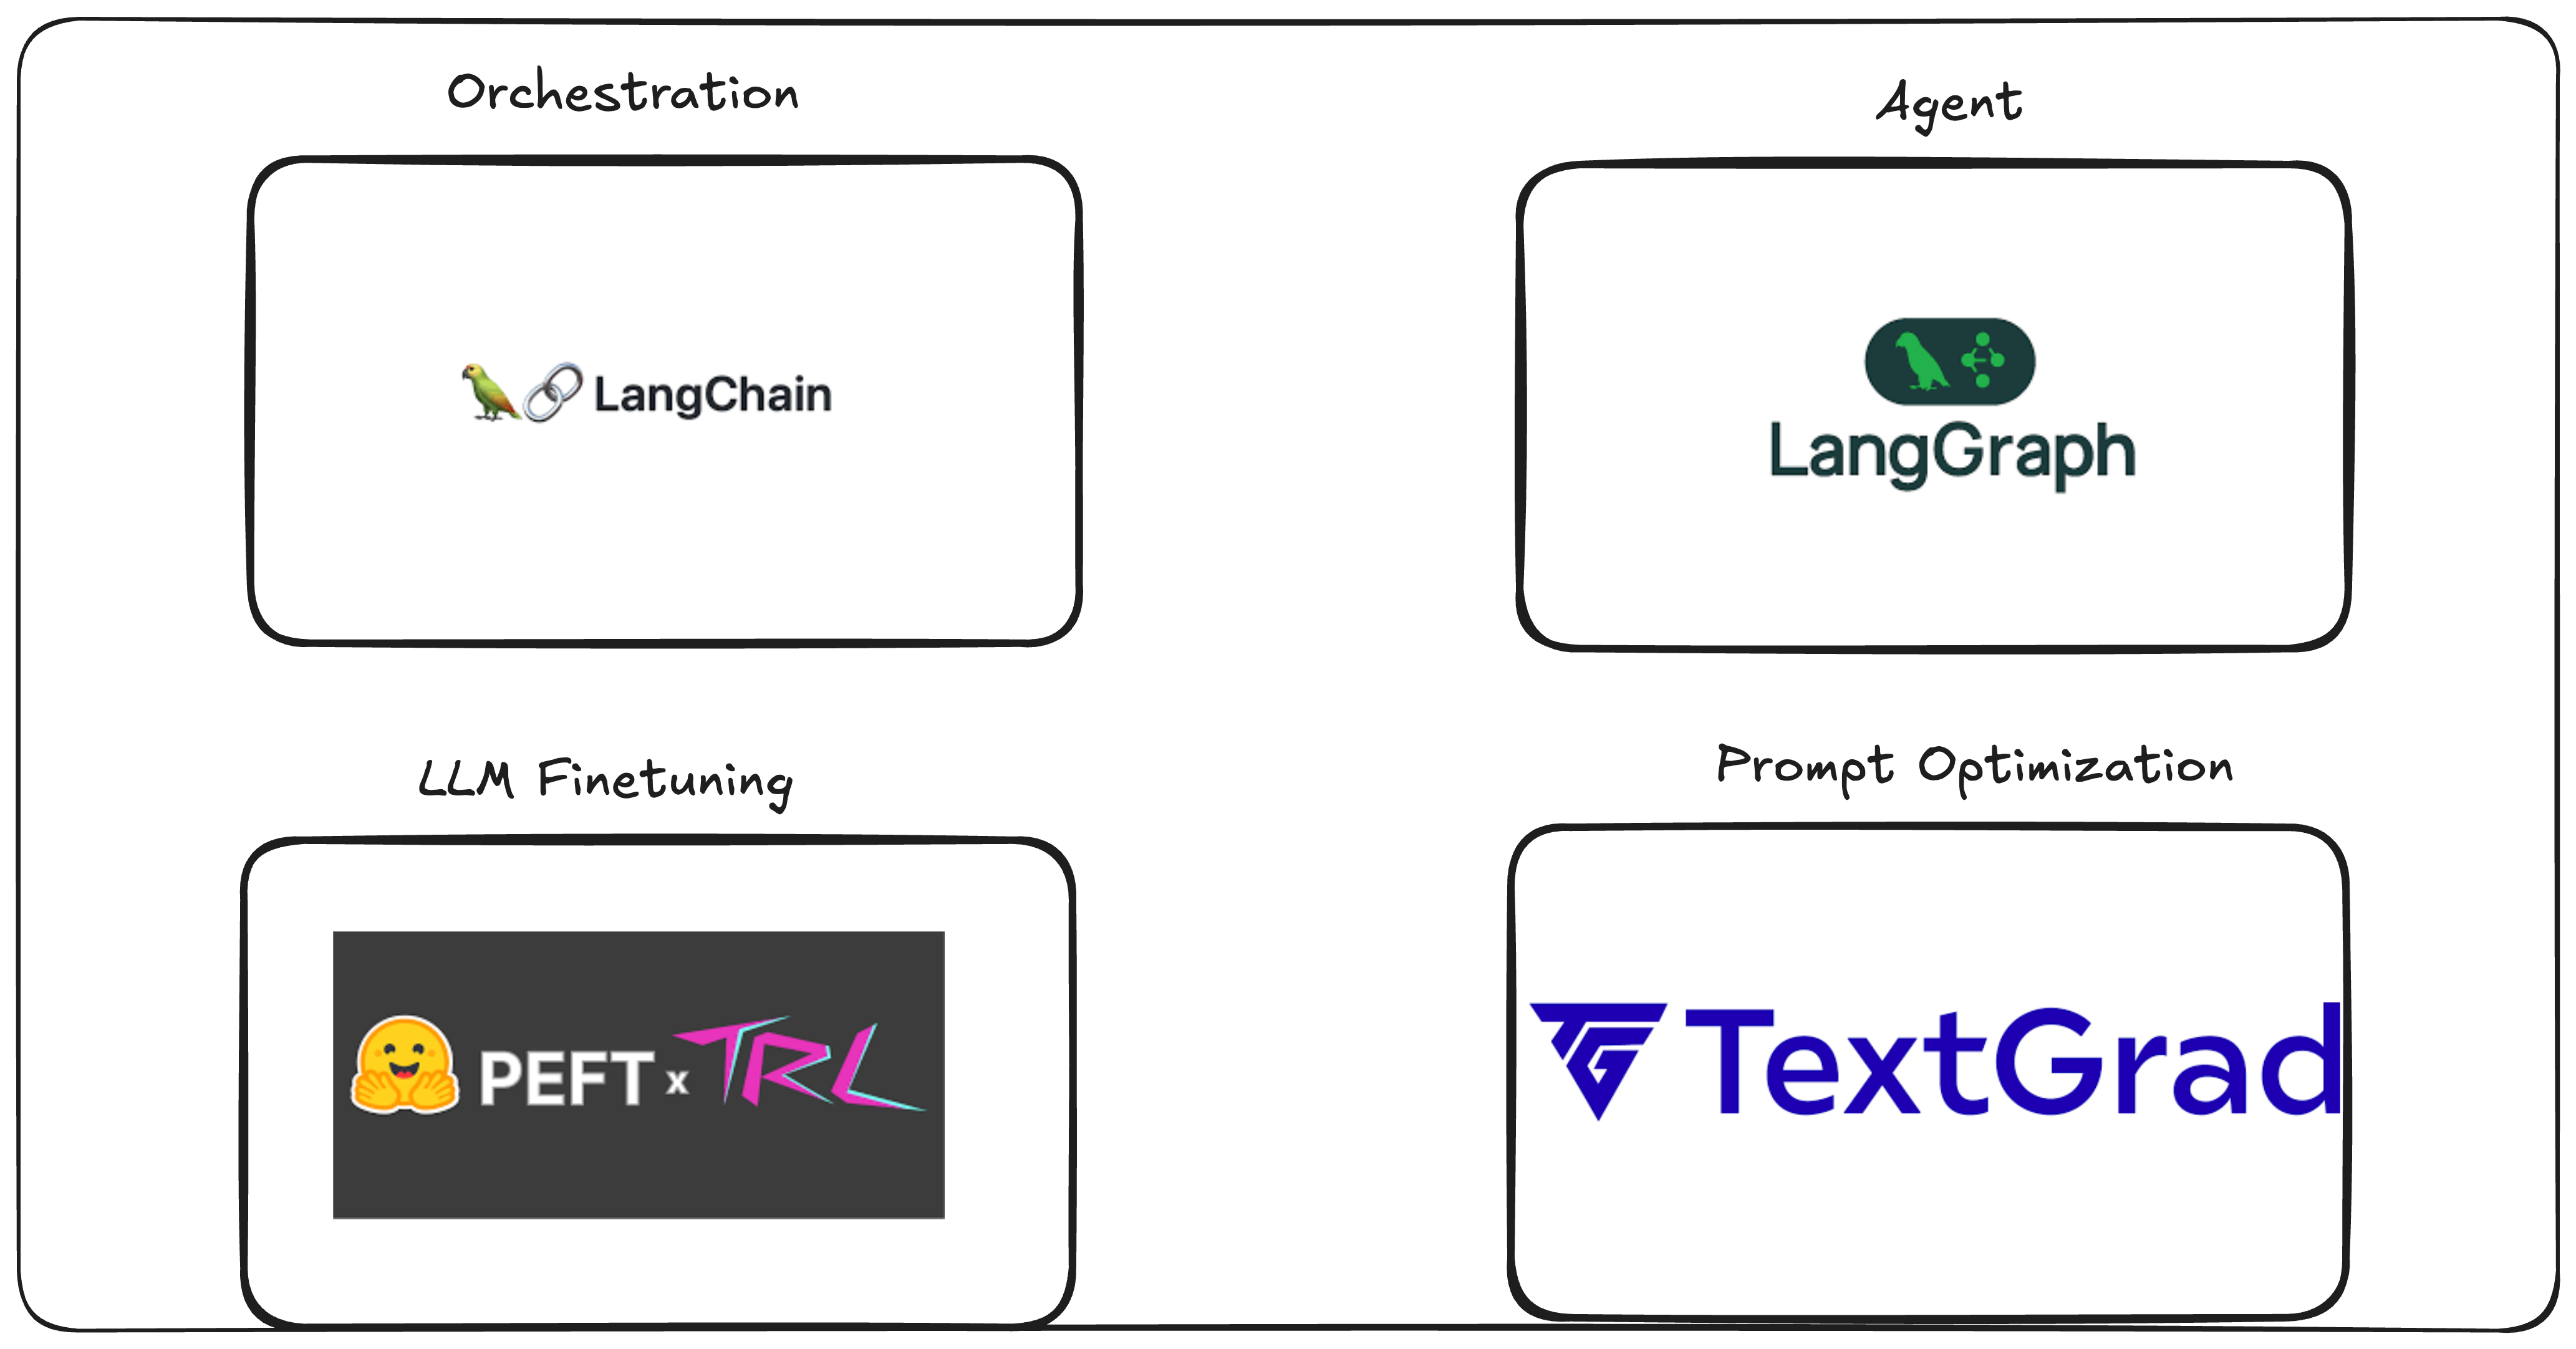

## Example: LangChain Basics

In [ ]:
!pip install langchain langchain-openai -q

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Initialize model
llm = ChatOpenAI(model="gpt-4o-mini")

# Create prompt template
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant that explains concepts simply."),
    ("user", "Explain {topic} in one sentence.")
])

# Build chain using LCEL (LangChain Expression Language)
chain = prompt | llm | StrOutputParser()

# Run
response = chain.invoke({"topic": "vector databases"})
print(response)
# Output: Vector databases store data as numerical embeddings to enable
#         fast similarity search based on meaning rather than exact matches.

Vector databases are specialized databases designed to store, manage, and query high-dimensional vector representations of data, enabling efficient similarity searches and machine learning applications.


## Introduction to AI Agents

## What is an AI Agent?

An **AI Agent** is an autonomous system that uses a Large Language Model (LLM) as its "brain" to reason about tasks, make decisions, and take actions to achieve a goal. Unlike a simple chatbot that just responds to prompts, an agent can break down complex problems, use external tools, and iteratively work toward a solution.

## Key Components

### 1. The LLM (Reasoning Engine)

The core intelligence that:

- Understands the user's request
- Decides what actions to take
- Interprets results from tools
- Formulates the final answer

### 2. Tools (Actions)

Functions the agent can execute to interact with the world:

- API calls (weather, databases, search engines)
- Calculations (math operations)
- File operations (read/write)
- Code execution
- Web scraping, etc.

### 3. Control Loop (Orchestration)

The agent's decision-making cycle:
```
User Query → LLM Reasoning → Decision:
                               ├─ Call Tool(s) → Get Results → Loop Back
                               └─ Provide Final Answer → Done
```

## How It Works

1. **Reasoning**: The LLM analyzes the task and decides if it needs tools
2. **Action**: If needed, the agent calls appropriate tools with specific parameters
3. **Observation**: Tool results are fed back to the LLM
4. **Iteration**: The cycle repeats until the LLM has enough information
5. **Response**: The agent provides a final, informed answer

## ReAct Pattern (Reason + Act)

This architecture follows the **ReAct** paradigm:

- **Reason**: Think about what needs to be done
- **Act**: Execute tools to gather information
- **Observe**: Process the results
- **Repeat**: Continue until the goal is achieved

## Why Agents Matter

Agents extend LLMs from passive responders to active problem-solvers that can:

- Break complex tasks into steps
- Gather real-time information
- Perform computations and automations
- Self-correct based on intermediate results
- Chain multiple tools together

## Example : A simple Agent using Langgraph

In [ ]:
!pip install langgraph langchain-openai -q

This is a mathematical reasoning agent that uses GPT-4o-mini with three arithmetic tools (multiply, add, subtract). When given a query like "What is 6 times 7?", the agent iteratively reasons about which tools to call, executes them, and uses the results to formulate a final answer. The agent follows a ReAct loop: LLM decides → calls tools → observes results → repeats until it has enough information to answer the user's question, with a maximum of 5 iterations to prevent infinite loops.

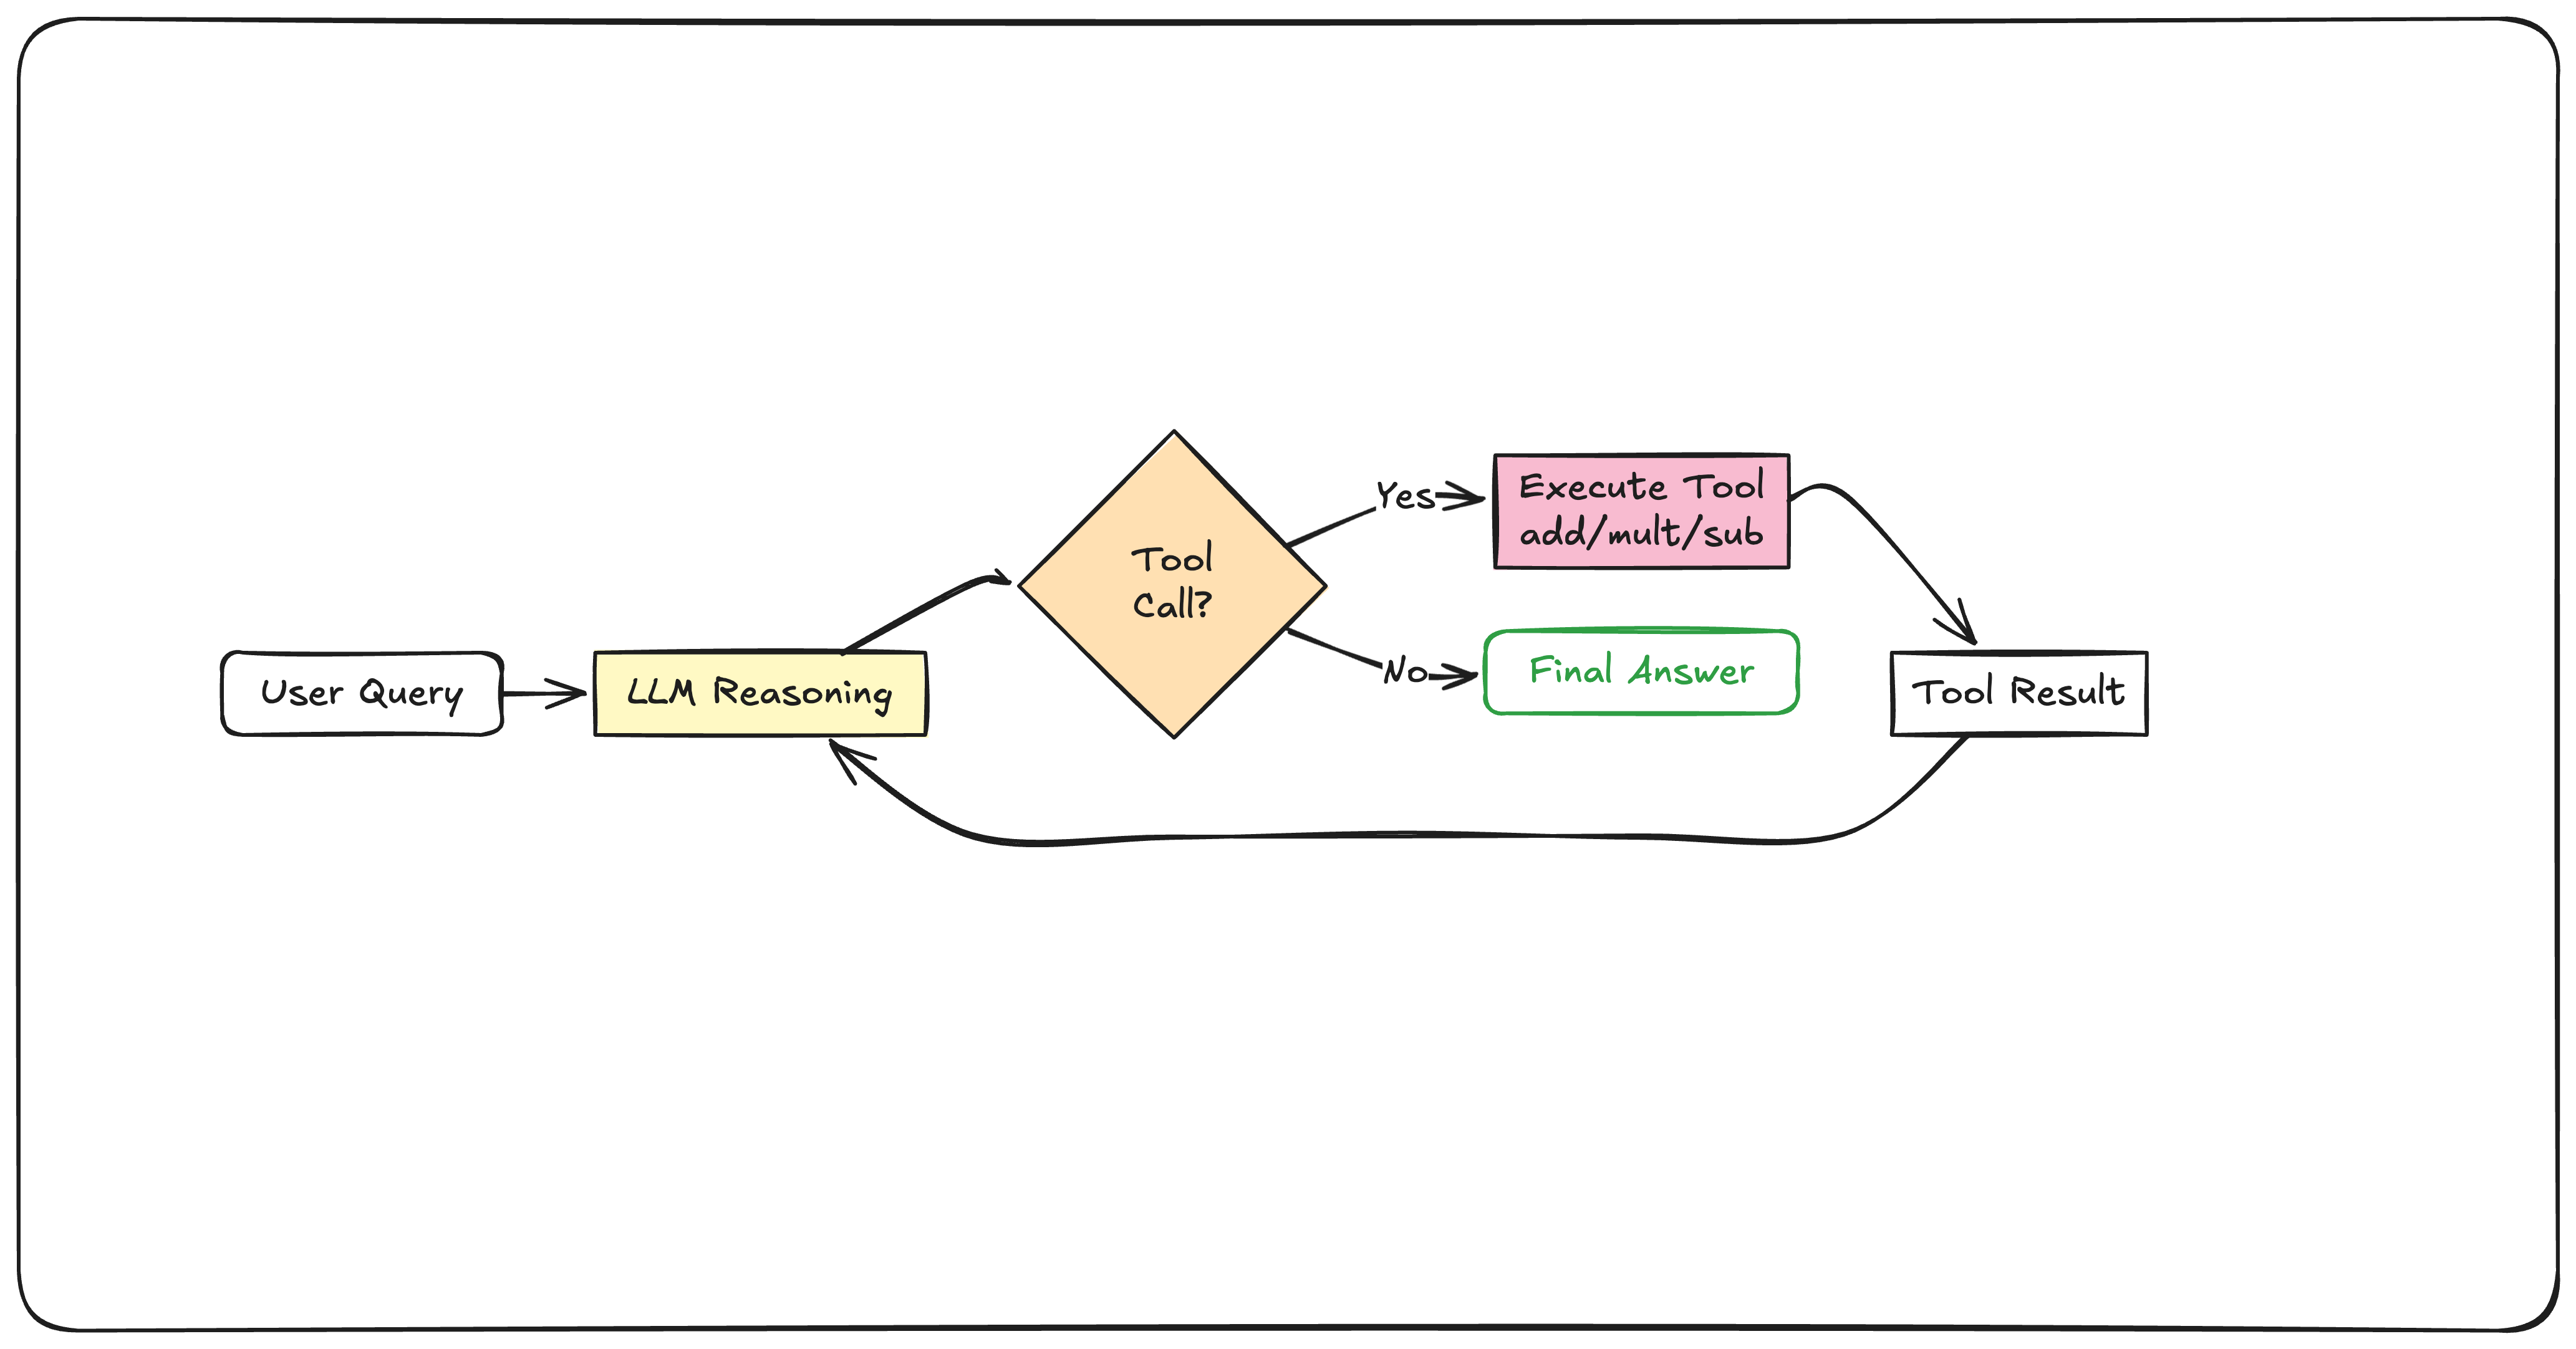

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, ToolMessage

In [ ]:
# Define tools
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

@tool
def add(a: int, b: int) -> int:
    """Add two numbers."""
    return a + b

@tool
def subtract(a: int, b: int) -> int:
    """Subtract two numbers."""
    return a - b

In [ ]:
# Bind tools to model
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools([multiply, add, subtract])

# Create tool lookup
tools_map = {"multiply": multiply, "add": add, "subtract": subtract}


In [ ]:

def run_agent_with_steps(query: str, max_iterations: int = 5):
    """Run agent and display each step."""

    messages = [HumanMessage(content=query)]

    print(f"{'='*60}")
    print(f"USER QUERY: {query}")
    print(f"{'='*60}\n")

    for i in range(max_iterations):
        # Step 1: LLM decides what to do
        print(f"--- Step {i+1}: LLM Thinking ---")
        response = llm_with_tools.invoke(messages)

        # Check if LLM wants to call tools
        if response.tool_calls:
            print(f"Decision: Call {len(response.tool_calls)} tool(s)\n")

            messages.append(response)

            # Step 2: Execute each tool call
            for tool_call in response.tool_calls:
                tool_name = tool_call["name"]
                tool_args = tool_call["args"]

                print(f"  🔧 TOOL CALL: {tool_name}")
                print(f"     Arguments: {tool_args}")

                # Execute the tool
                tool_fn = tools_map[tool_name]
                result = tool_fn.invoke(tool_args)

                print(f"     Result: {result}\n")

                # Add tool result to messages
                messages.append(ToolMessage(
                    content=str(result),
                    tool_call_id=tool_call["id"]
                ))
        else:
            # No more tool calls - LLM has final answer
            print(f"Decision: Provide final answer\n")
            print(f"{'='*60}")
            print(f"FINAL ANSWER: {response.content}")
            print(f"{'='*60}")
            return response.content

    return "Max iterations reached"


# Example 1: Single tool call
run_agent_with_steps("What is 6 times 7?")

USER QUERY: What is 6 times 7?

--- Step 1: LLM Thinking ---
Decision: Call 1 tool(s)

  🔧 TOOL CALL: multiply
     Arguments: {'a': 6, 'b': 7}
     Result: 42

--- Step 2: LLM Thinking ---
Decision: Provide final answer

FINAL ANSWER: 6 times 7 is 42.


'6 times 7 is 42.'

# 4. LLM Infrastructure

| Deployment Type | Tools | Description |
|-----------------|-------|-------------|
| **Local** | LM Studio, Ollama, kobold.cpp | Run models on personal hardware with simple UI or CLI |
| **Demo/Prototype** | Gradio, Streamlit, HF Spaces | Quickly build and share interactive ML demos |
| **Production Server** | vLLM, TGI, Ray Serve | High-throughput inference with batching and optimization |
| **Edge** | MLC LLM, mnn-llm | Deploy on mobile, browser, and resource-constrained devices |
| **Cloud Orchestration** | SkyPilot | Manage GPU workloads across cloud providers |

---

### Example: Optimizing LLM Inference with vLLM




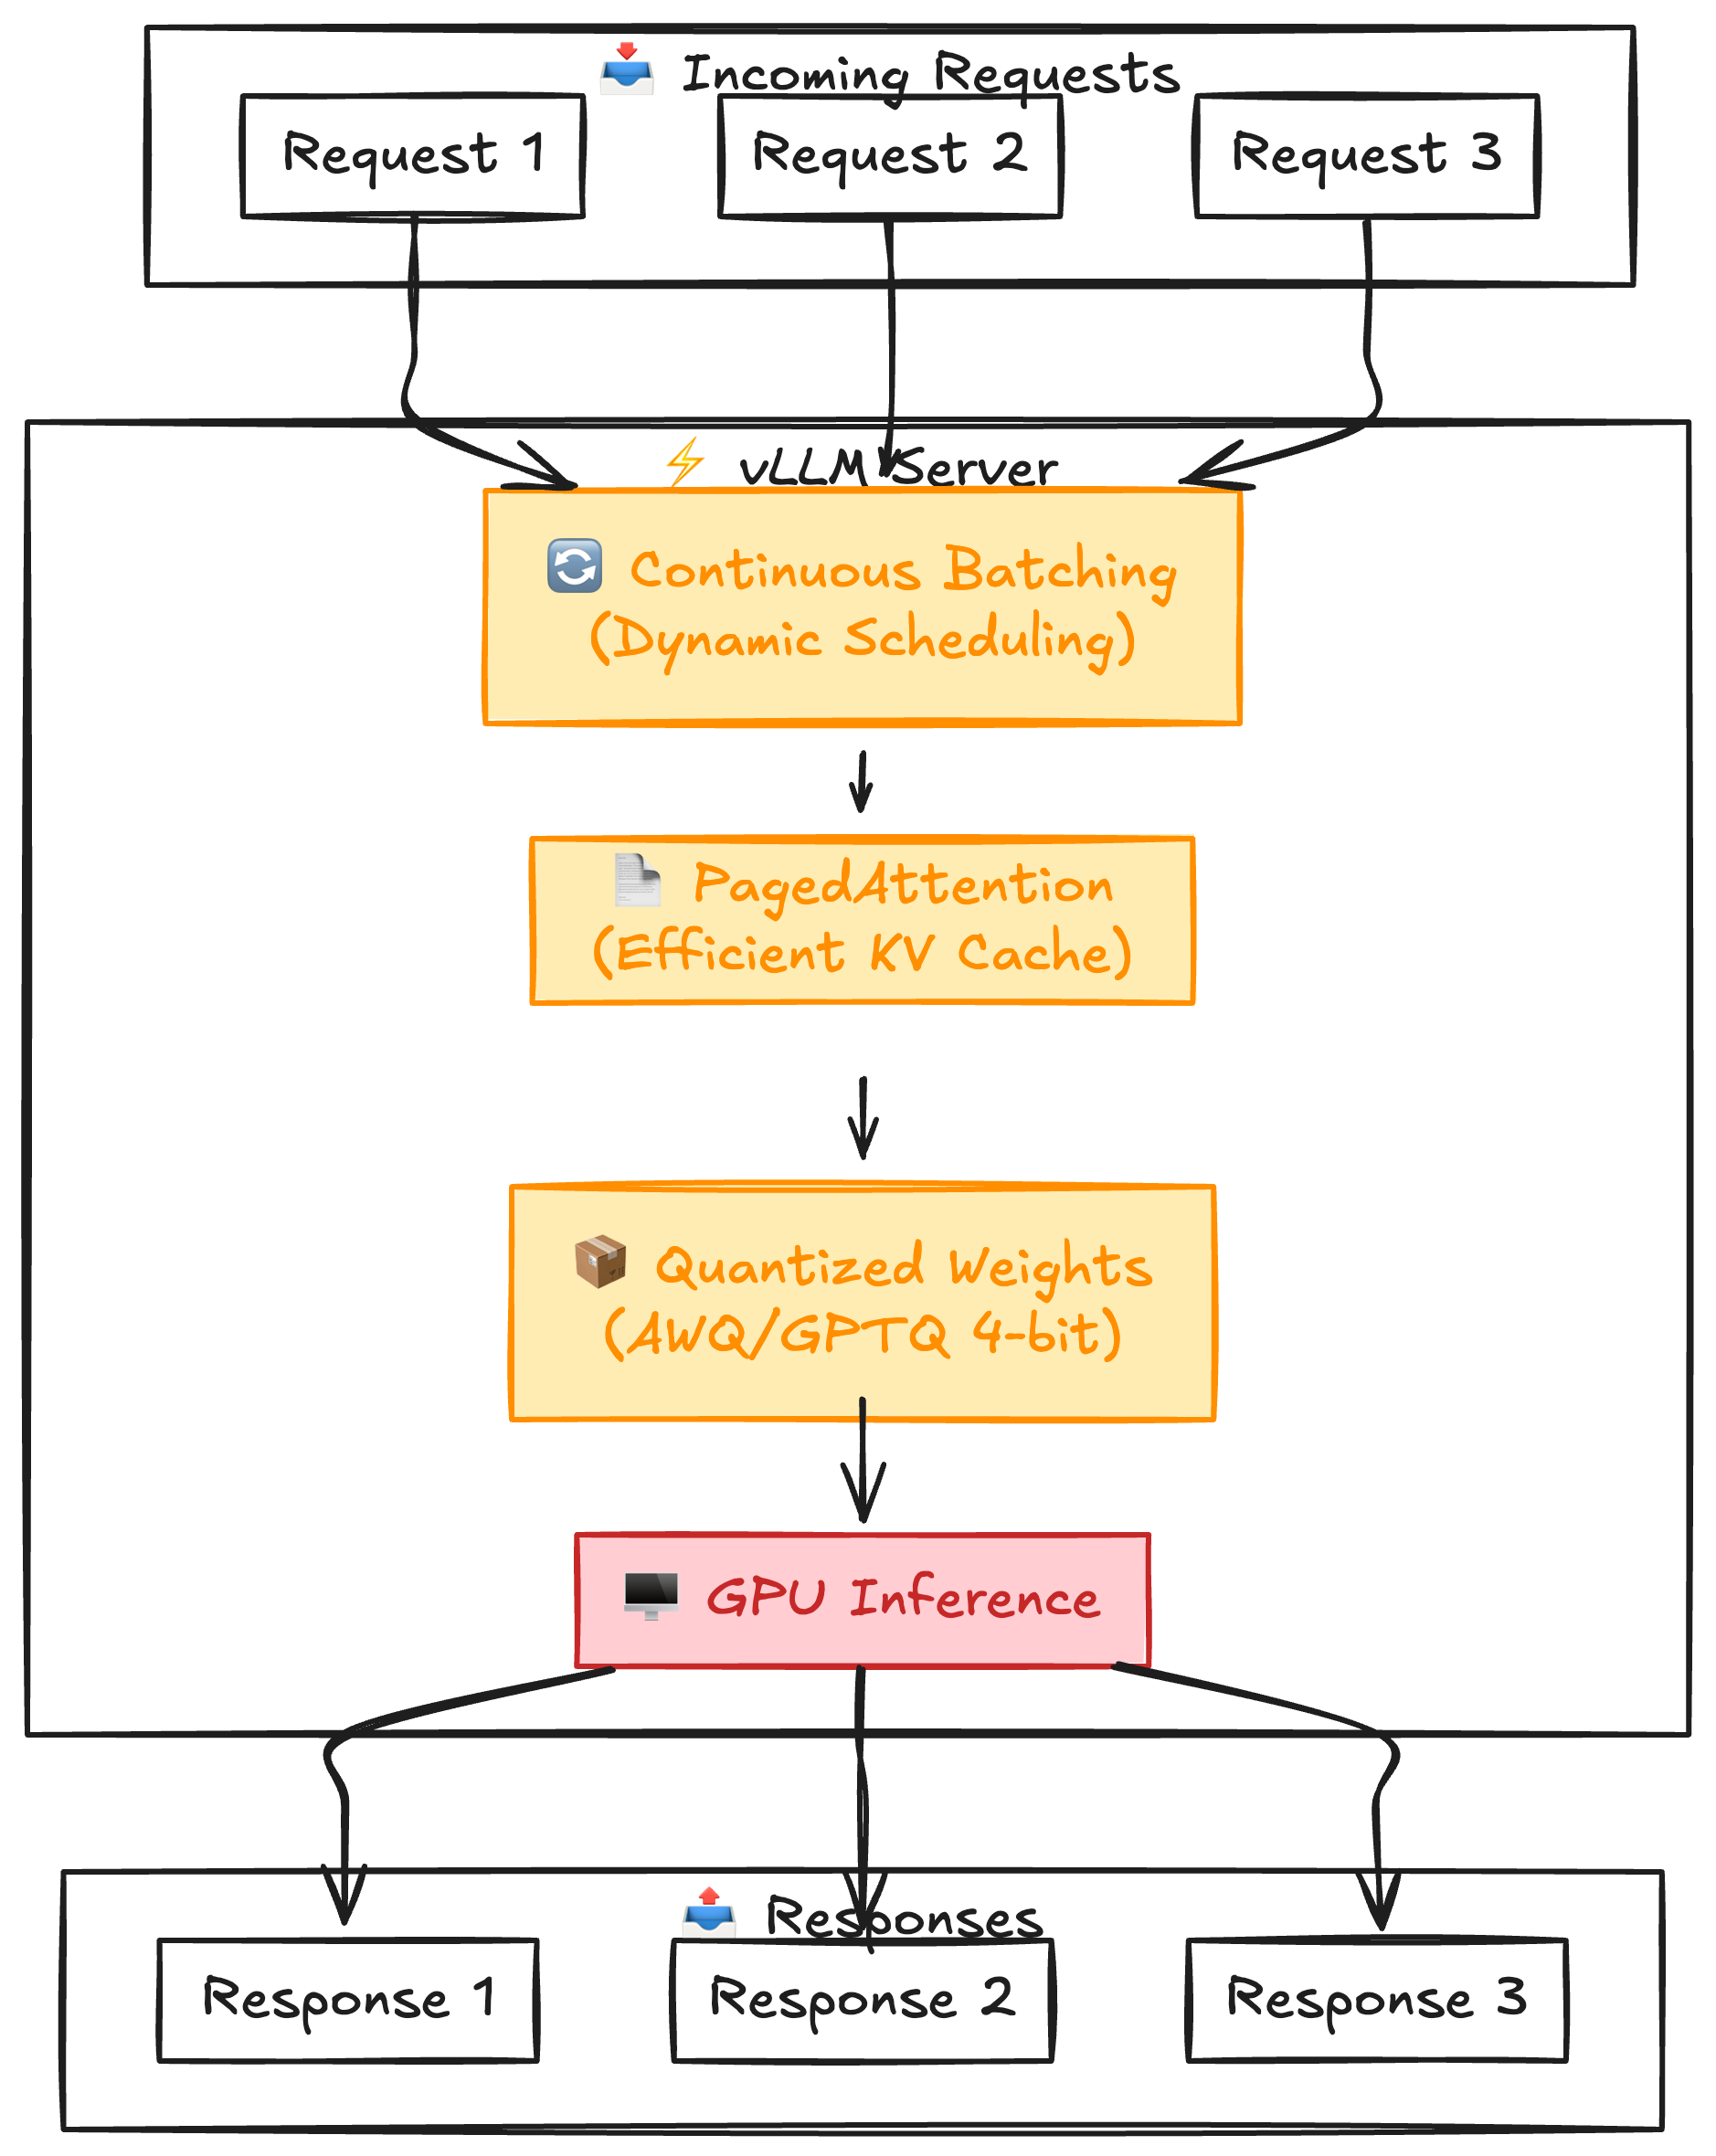

#### vLLM Features Overview

**vLLM** (Virtual Large Language Model) is a high-throughput, memory-efficient inference engine for LLMs. It's designed for production deployments where speed and cost matter.

##### Core Features

| Feature | Description | Benefit |
|---------|-------------|---------|
| **PagedAttention** | Manages KV cache like OS virtual memory with fixed-size blocks | 24x higher throughput vs HuggingFace |
| **Continuous Batching** | Dynamically adds/removes requests mid-generation | No idle GPU time waiting for long sequences |
| **Quantization Support** | AWQ, GPTQ, FP8, INT8, GGUF | 2-4x memory reduction, faster inference |
| **Tensor Parallelism** | Split model across multiple GPUs | Run 70B+ models on consumer hardware |
| **Speculative Decoding** | Use small draft model to predict tokens | Up to 2x speedup for compatible models |
| **Prefix Caching** | Cache common prompt prefixes | Faster responses for repeated system prompts |

##### Supported Model Architectures

| Architecture | Example Models |
|--------------|----------------|
| Llama/Llama 2/3 | Meta-Llama-3.1-70B, CodeLlama |
| Mistral/Mixtral | Mistral-7B, Mixtral-8x7B (MoE) |
| Qwen/Qwen2 | Qwen2.5-72B, Qwen-VL (multimodal) |
| Phi | Phi-3-mini, Phi-3-medium |
| Gemma | Gemma-2-9B, Gemma-2-27B |
| DeepSeek | DeepSeek-V2, DeepSeek-Coder |
| StarCoder | StarCoder2-15B |
| Falcon | Falcon-40B, Falcon-180B |


**Trial in runpod**

Following bash commands can be used
```
huggingface-cli download openai-community/gpt2 \
  --local-dir ./gpt2 \
  --include "*"
```

```
vllm serve ./gpt2 \
  --host 0.0.0.0 \
  --port 8000
```
```
curl -v http://127.0.0.1:8000/v1/completions \
  -H "Content-Type: application/json" \
  -H "Authorization: Bearer dummy" \
  -d '{
    "model": "./gpt2",
    "prompt": "Say hello from inside the pod.",
    "max_tokens": 20
  }'

```

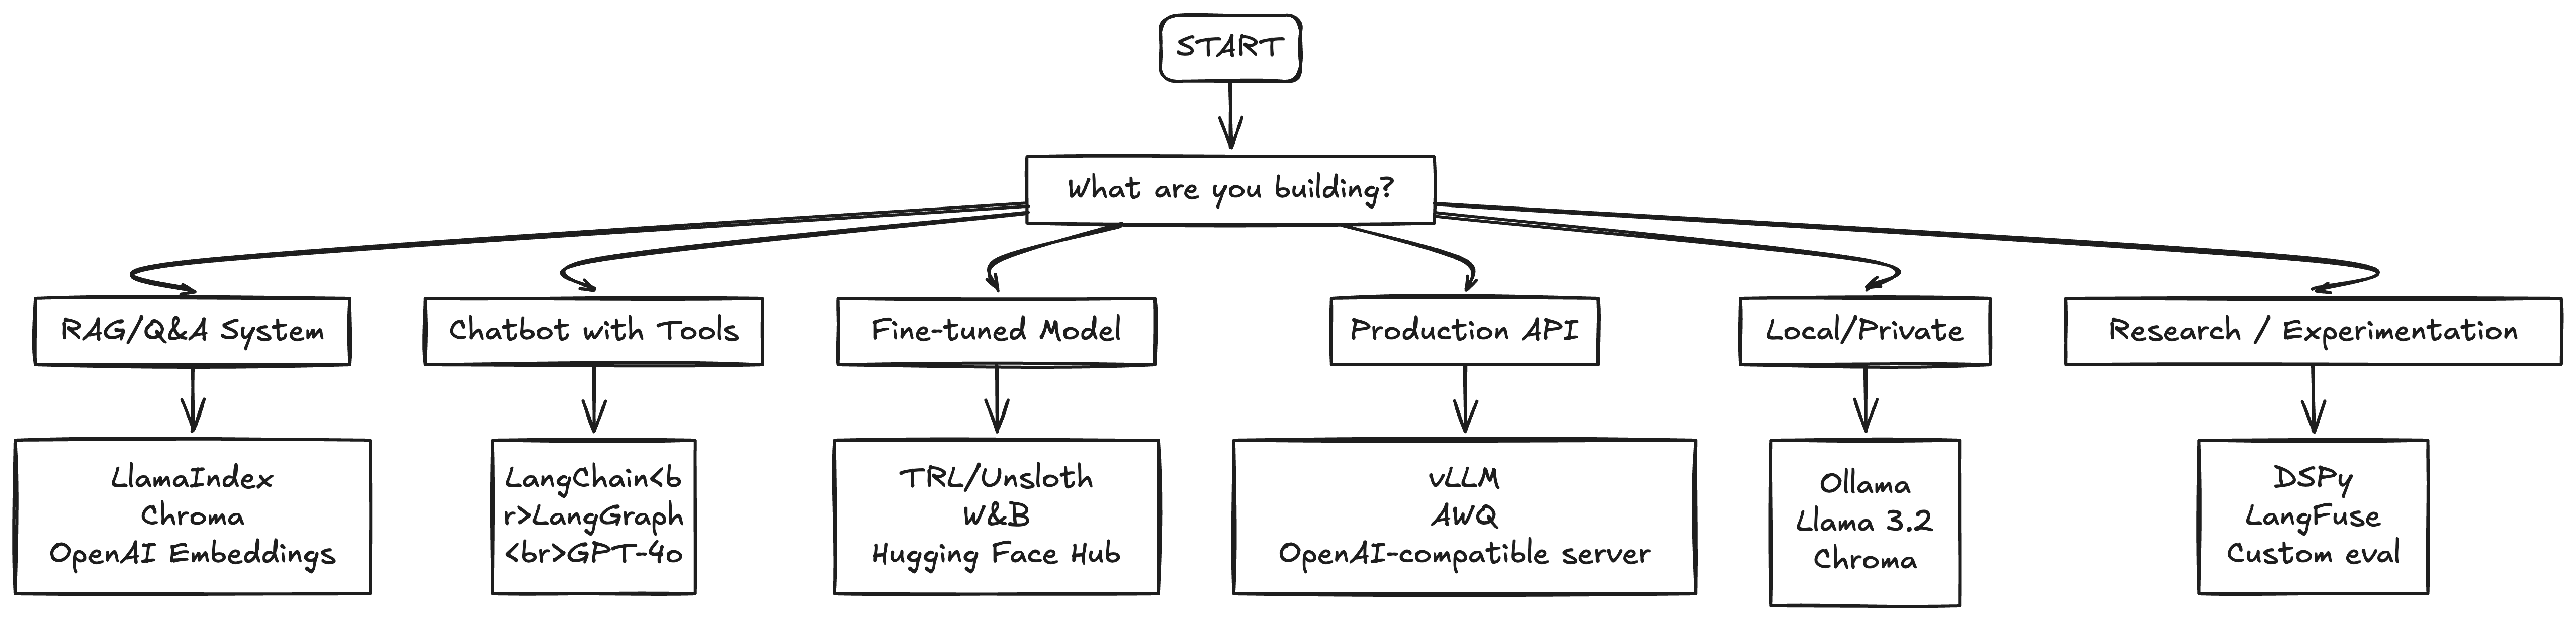